In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_MM_Int.csv')
Validation_data = pd.read_csv('Valid_MM_Int.csv')
Test_data = pd.read_csv('Test_MM_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12000 non-null  int64  
 1   Age                         12000 non-null  float64
 2   AnnualIncome                12000 non-null  float64
 3   CreditScore                 12000 non-null  float64
 4   EmploymentStatus            12000 non-null  float64
 5   EducationLevel              12000 non-null  float64
 6   Experience                  12000 non-null  float64
 7   LoanAmount                  12000 non-null  float64
 8   LoanDuration                12000 non-null  float64
 9   MaritalStatus               12000 non-null  float64
 10  NumberOfDependents          12000 non-null  float64
 11  HomeOwnershipStatus         12000 non-null  float64
 12  MonthlyDebtPayments         12000 non-null  float64
 13  CreditCardUtilizationRate   120

In [3]:
Train_data.head()

Unnamed: 0       Age  AnnualIncome  CreditScore  EmploymentStatus  \
0           0  0.629032      0.068100     0.455285               0.0   
1           1  0.209677      0.063154     0.661247               0.0   
2           2  0.354839      0.152409     0.720867               0.0   
3           3  0.661290      0.409754     0.875339               0.0   
4           4  0.225806      0.083607     0.626016               0.0   

   EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  ...  \
0            0.00    0.573770    0.067100      0.111111       0.333333  ...   
1            0.75    0.098361    0.213760      0.666667       0.333333  ...   
2            0.75    0.295082    0.077842      0.222222       0.000000  ...   
3            0.50    0.590164    0.088966      0.444444       0.333333  ...   
4            1.00    0.196721    0.185708      0.333333       0.000000  ...   

   MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0       0.039867                    0.614466     0.1250  0.012799   
1       0.104225                    0.622996     0.3750  0.036481   
2       0.251523                    0.626327     0.1250  0.013550   
3       0.676225                    0.874832     0.1875  0.027415   
4       0.137979                    0.600710     0.2500  0.003406   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.382726      0.441758            0.070022                0.120071   
1          0.522959      0.645749            0.110911                0.089347   
2          0.247945      0.305184            0.053450                0.032016   
3          0.224353      0.214225            0.038018                0.007892   
4          0.419008      0.392349            0.104443                0.080741   

   LoanApproved  RiskScore  
0           0.0   0.402174  
1           0.0   0.384058  
2           0.0   0.438406  
3           1.0   0.086957  
4           0.0   0.438406  

[5 rows x 36 columns]

In [18]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('Unnamed: 0',axis=1)
y_training = Train_data['LoanApproved']

In [19]:
y_training.min()

0.0

In [20]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('Unnamed: 0',axis=1)
y_validation = Validation_data['LoanApproved']

In [21]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('Unnamed: 0',axis=1)
y_testing = Test_data['LoanApproved']

In [22]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [23]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [24]:
print(y_training)

[0. 0. 0. ... 1. 0. 0.]


In [25]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [26]:
print(X_training.shape)

(12000, 34)


Training Losses are 
          0
0  0.792485
1  0.788847
2  0.785267
3  0.781743
4  0.778274
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


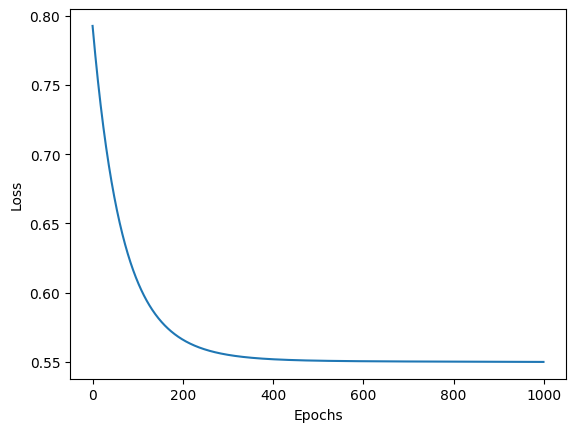

Training Losses are 
          0
0  0.937651
1  0.927709
2  0.918010
3  0.908550
4  0.899325
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


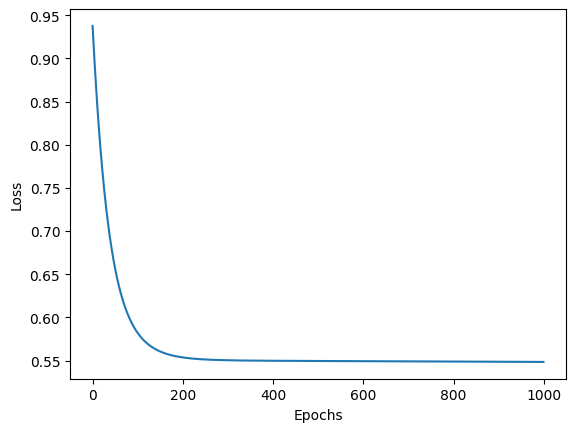

Training Losses are 
          0
0  0.662899
1  0.658231
2  0.653767
3  0.649497
4  0.645413
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


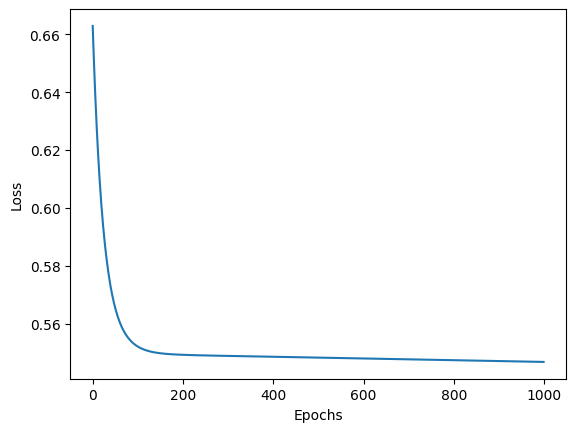

Training Losses are 
          0
0  0.780521
1  0.761782
2  0.744591
3  0.728830
4  0.714386
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


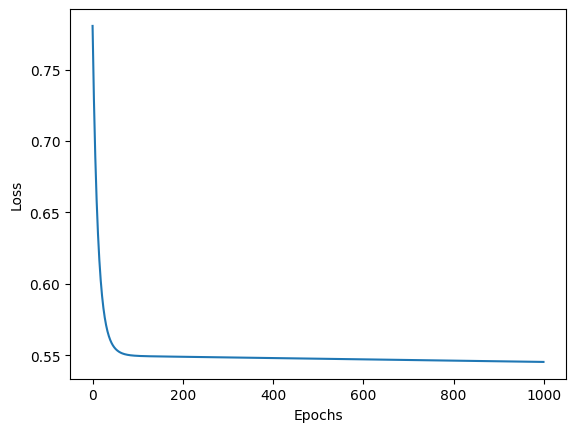

Training Losses are 
          0
0  0.647756
1  0.632854
2  0.620295
3  0.609694
4  0.600728
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


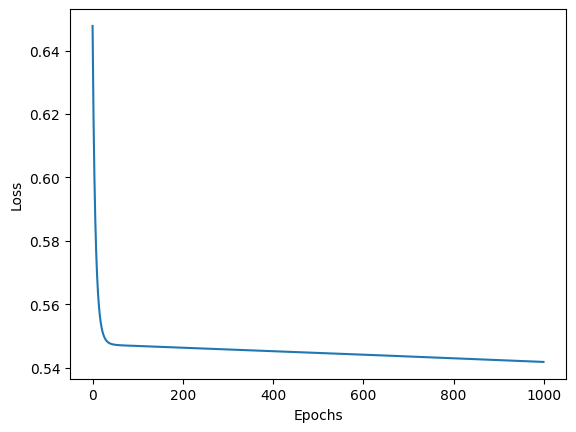

Best accuracy for test data is 0.761 for degree 8


In [27]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.715638
1  0.713469
2  0.711316
3  0.709178
4  0.707055
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 866   90]]
Accuracy: 0.7835, Precision: 1.0000, Recall: 0.0941, F1-score: 0.1721

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 857   99]]
Accuracy: 0.7857, Precision: 1.0000, Recall: 0.1036, F1-score: 0.1877



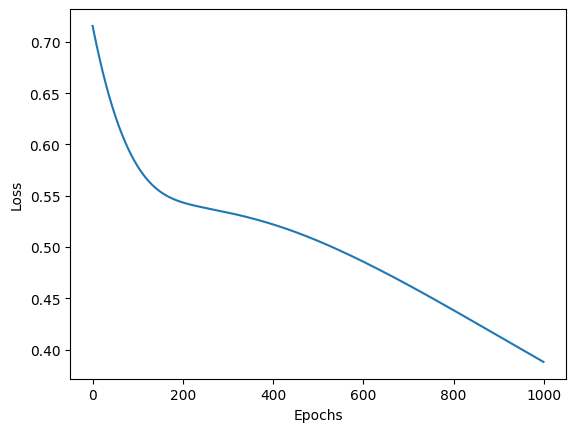

Training Losses are 
          0
0  0.622892
1  0.620408
2  0.617966
3  0.615567
4  0.613212
Validation Data
Confusion Matrix for hidden layer 16
[[3030   14]
 [ 348  608]]
Accuracy: 0.9095, Precision: 0.9775, Recall: 0.6360, F1-score: 0.7706

Test Data
Confusion Matrix for hiden layer 16
[[3031   13]
 [ 327  629]]
Accuracy: 0.9150, Precision: 0.9798, Recall: 0.6579, F1-score: 0.7872



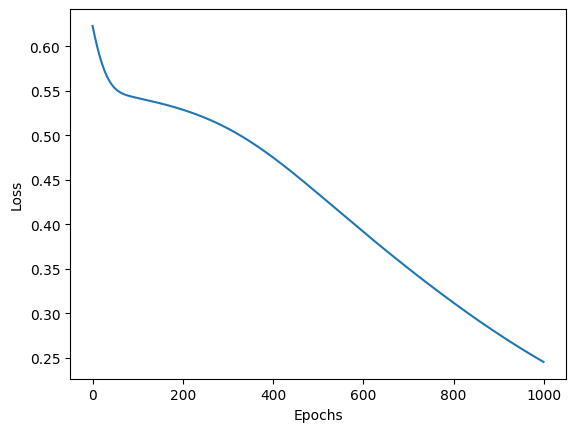

Training Losses are 
          0
0  0.664186
1  0.658588
2  0.653143
3  0.647852
4  0.642716
Validation Data
Confusion Matrix for hidden layer 32
[[3027   17]
 [ 156  800]]
Accuracy: 0.9567, Precision: 0.9792, Recall: 0.8368, F1-score: 0.9024

Test Data
Confusion Matrix for hiden layer 32
[[3028   16]
 [ 147  809]]
Accuracy: 0.9593, Precision: 0.9806, Recall: 0.8462, F1-score: 0.9085



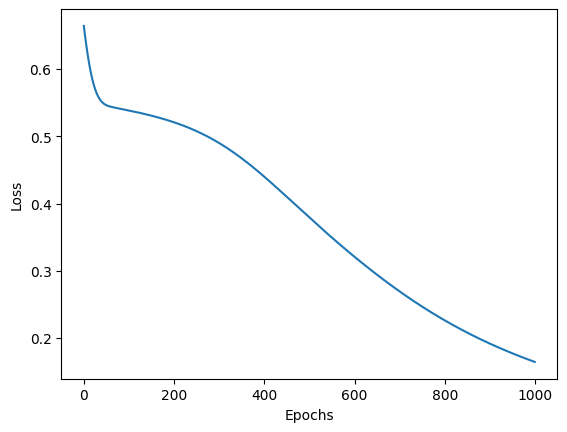

Training Losses are 
          0
0  0.607474
1  0.600741
2  0.594442
3  0.588578
4  0.583151
Validation Data
Confusion Matrix for hidden layer 64
[[3029   15]
 [  49  907]]
Accuracy: 0.9840, Precision: 0.9837, Recall: 0.9487, F1-score: 0.9659

Test Data
Confusion Matrix for hiden layer 64
[[3029   15]
 [  42  914]]
Accuracy: 0.9858, Precision: 0.9839, Recall: 0.9561, F1-score: 0.9698



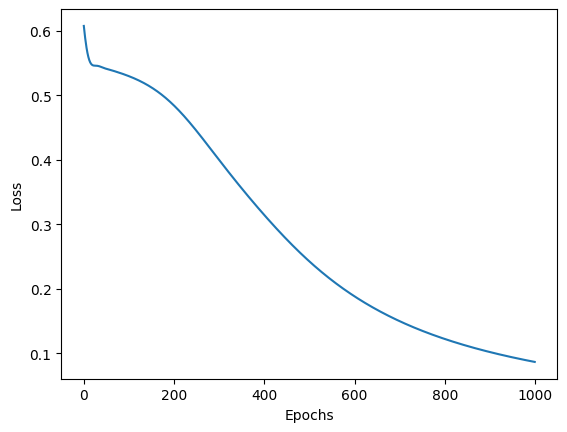

Training Losses are 
          0
0  0.626734
1  0.612527
2  0.599855
3  0.588711
4  0.579072
Validation Data
Confusion Matrix for hidden layer 128
[[3029   15]
 [  32  924]]
Accuracy: 0.9882, Precision: 0.9840, Recall: 0.9665, F1-score: 0.9752

Test Data
Confusion Matrix for hiden layer 128
[[3031   13]
 [  22  934]]
Accuracy: 0.9912, Precision: 0.9863, Recall: 0.9770, F1-score: 0.9816



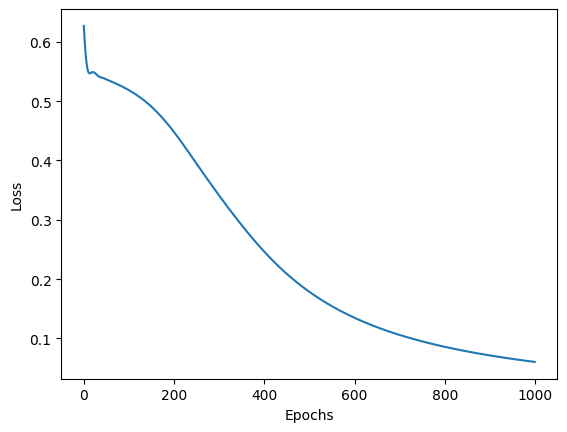

Best accuracy for test data is 0.99125 for degree 128


In [28]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [29]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.650770
1  0.649364
2  0.647978
3  0.646613
4  0.645269
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


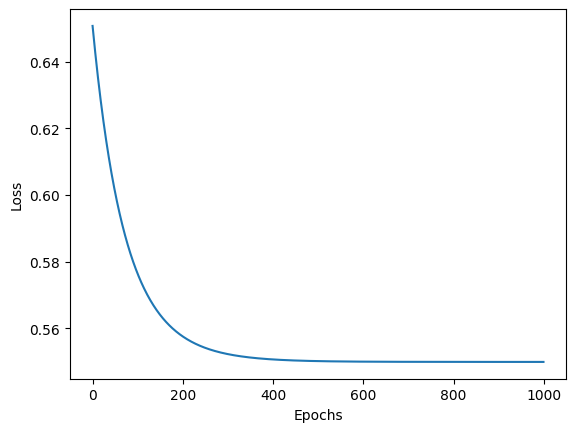

Training Losses are 
          0
0  0.836145
1  0.829165
2  0.822354
3  0.815708
4  0.809225
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


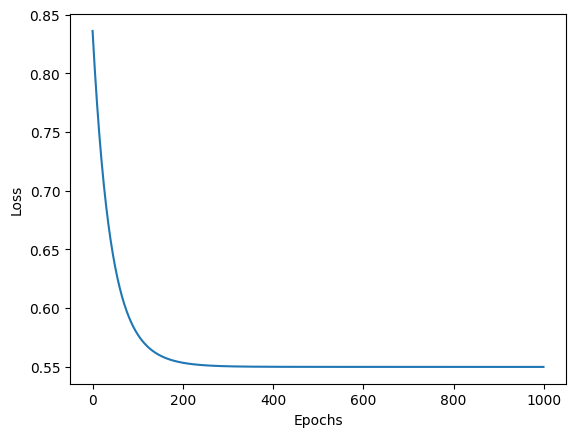

Training Losses are 
          0
0  0.618067
1  0.615333
2  0.612717
3  0.610213
4  0.607814
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


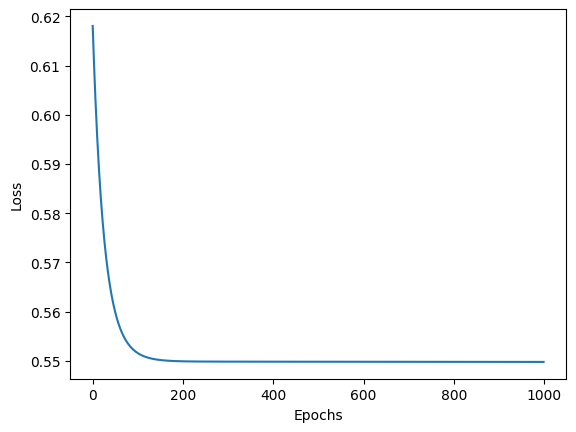

Training Losses are 
          0
0  0.663001
1  0.653876
2  0.645531
3  0.637897
4  0.630910
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


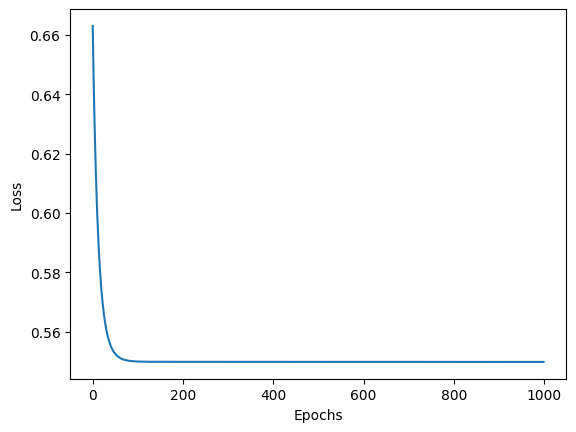

Training Losses are 
          0
0  0.757049
1  0.754075
2  0.751143
3  0.748255
4  0.745408
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


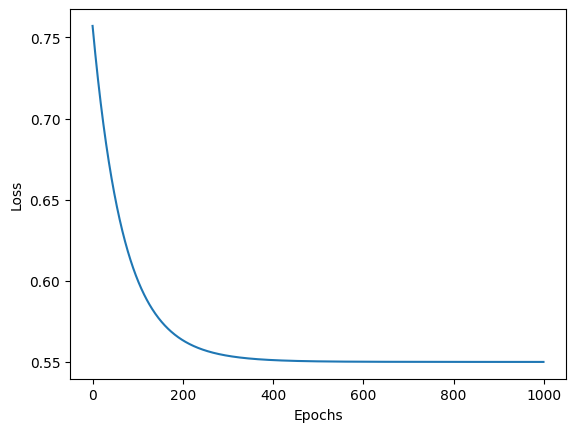

Training Losses are 
          0
0  0.909422
1  0.900459
2  0.891712
3  0.883176
4  0.874847
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


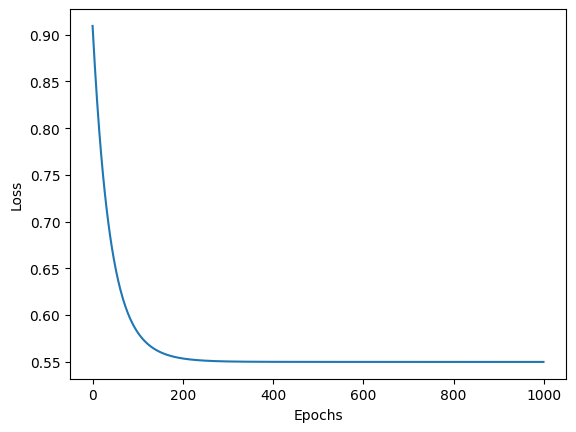

Training Losses are 
          0
0  0.830860
1  0.818137
2  0.805987
3  0.794388
4  0.783318
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


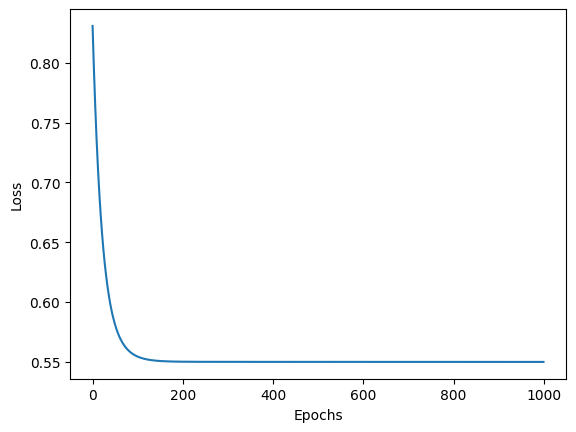

Training Losses are 
          0
0  0.654030
1  0.645602
2  0.637897
3  0.630850
4  0.624403
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


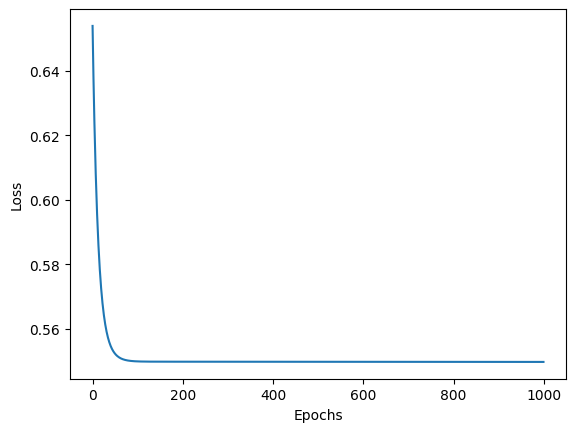

Training Losses are 
          0
0  0.698338
1  0.696157
2  0.694009
3  0.691895
4  0.689813
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


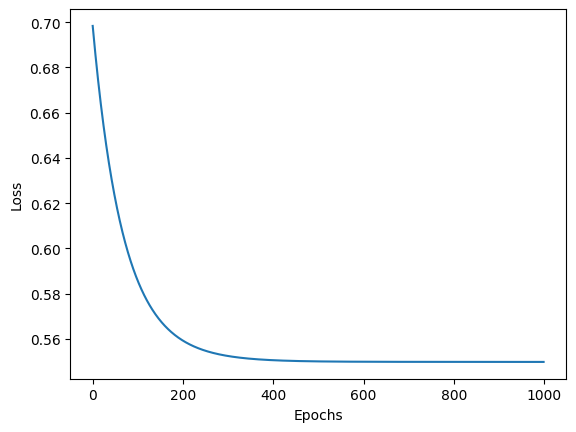

Training Losses are 
          0
0  0.730616
1  0.725781
2  0.721081
3  0.716511
4  0.712069
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


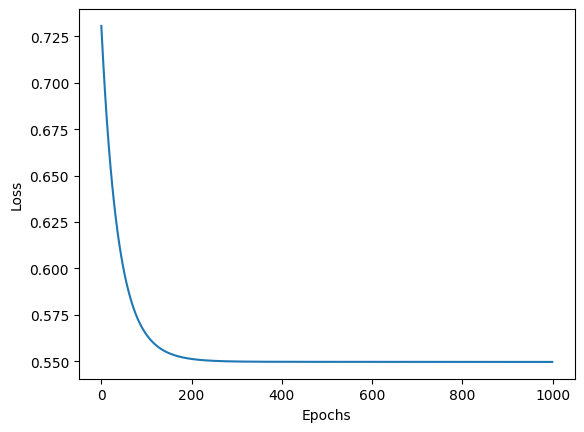

Training Losses are 
          0
0  0.593922
1  0.592034
2  0.590232
3  0.588512
4  0.586869
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


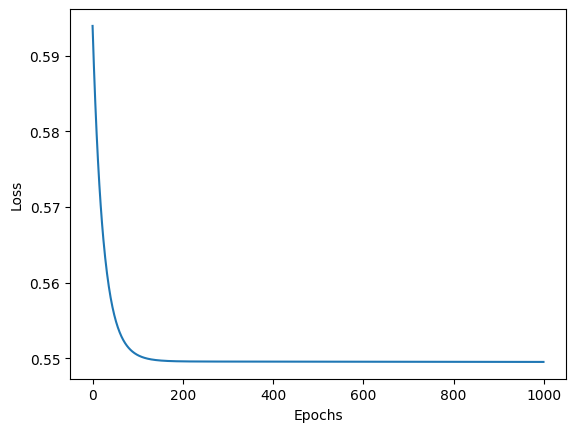

Training Losses are 
          0
0  0.761156
1  0.744277
2  0.728784
3  0.714566
4  0.701523
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


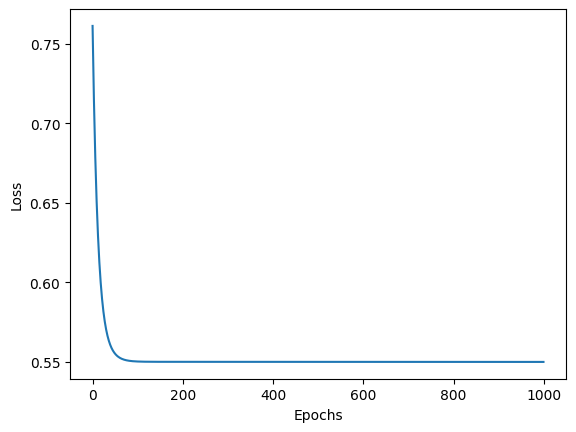

Training Losses are 
          0
0  0.710905
1  0.708403
2  0.705941
3  0.703520
4  0.701138
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


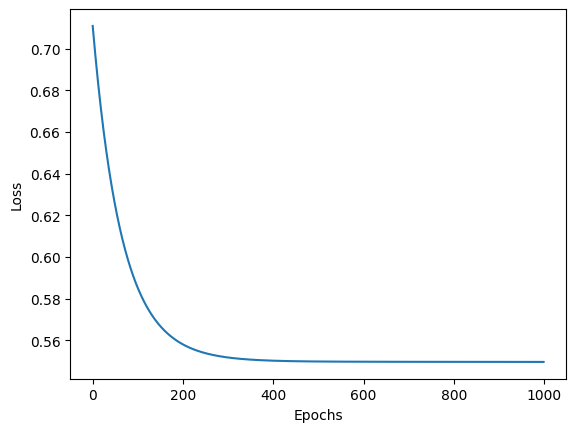

Training Losses are 
          0
0  0.640862
1  0.638625
2  0.636446
3  0.634323
4  0.632255
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


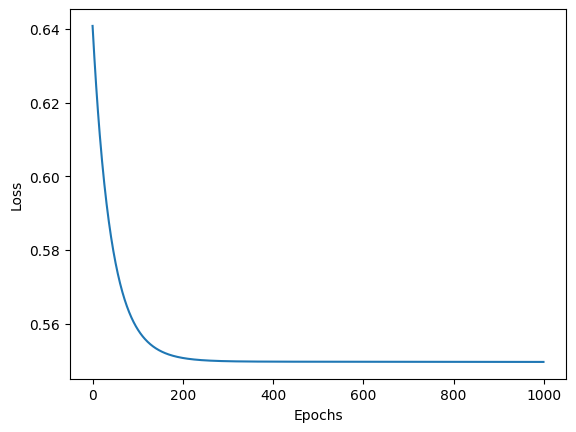

Training Losses are 
          0
0  0.780133
1  0.769488
2  0.759349
3  0.749692
4  0.740497
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


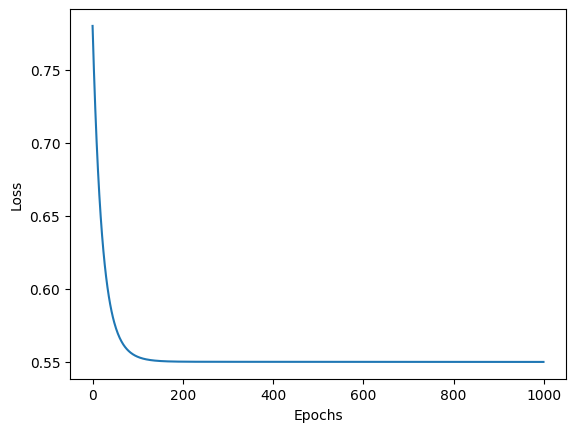

Training Losses are 
          0
0  0.718768
1  0.704908
2  0.692234
3  0.680643
4  0.670044
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


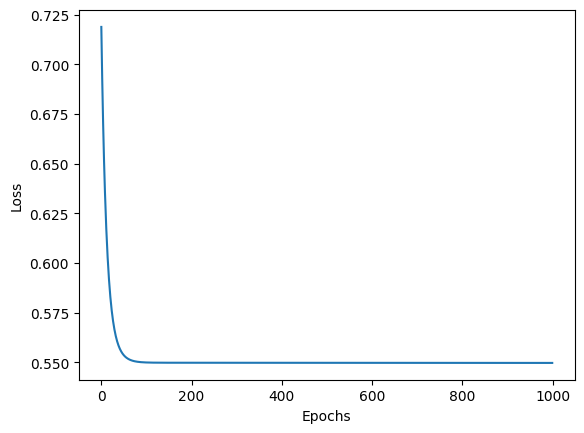

Best accuracy for test data is 0.761 for degree 8 & 8


In [30]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
layer_xyz=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
        layer_xyz=double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3} & {layer_xyz}")

Training Losses are 
          0
0  0.863911
1  0.861213
2  0.858528
3  0.855858
4  0.853201
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


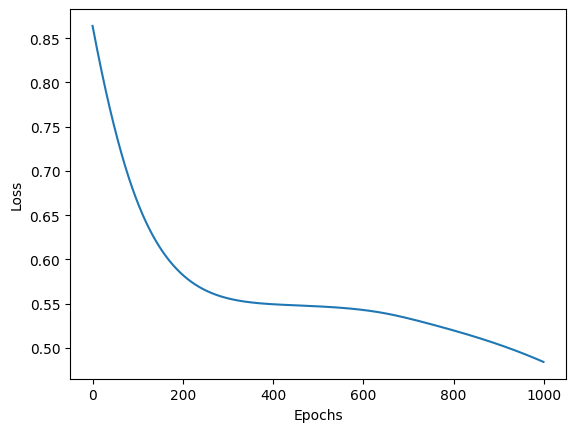

Training Losses are 
          0
0  0.791000
1  0.787073
2  0.783185
3  0.779335
4  0.775524
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3043    1]
 [ 776  180]]
Accuracy: 0.8057, Precision: 0.9945, Recall: 0.1883, F1-score: 0.3166

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3043    1]
 [ 775  181]]
Accuracy: 0.8060, Precision: 0.9945, Recall: 0.1893, F1-score: 0.3181



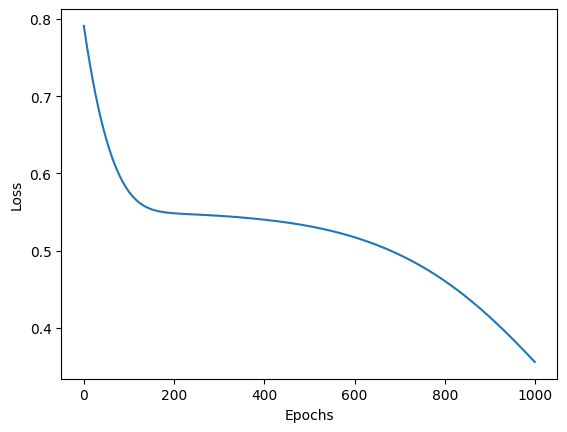

Training Losses are 
          0
0  0.618232
1  0.614546
2  0.610969
3  0.607503
4  0.604148
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3025   19]
 [  54  902]]
Accuracy: 0.9818, Precision: 0.9794, Recall: 0.9435, F1-score: 0.9611

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3026   18]
 [  46  910]]
Accuracy: 0.9840, Precision: 0.9806, Recall: 0.9519, F1-score: 0.9660



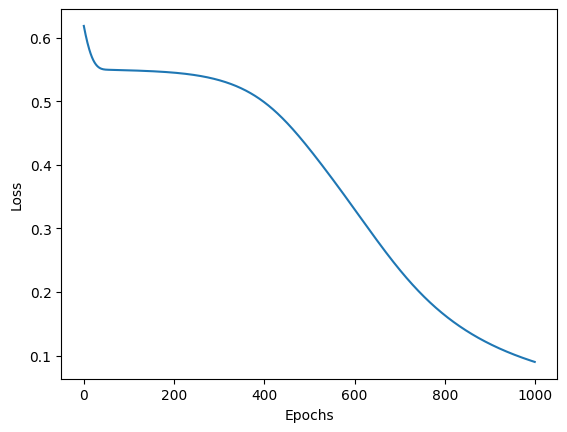

Training Losses are 
          0
0  0.575788
1  0.571746
2  0.568070
3  0.564760
4  0.561814
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3029   15]
 [  24  932]]
Accuracy: 0.9902, Precision: 0.9842, Recall: 0.9749, F1-score: 0.9795

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3032   12]
 [  17  939]]
Accuracy: 0.9928, Precision: 0.9874, Recall: 0.9822, F1-score: 0.9848



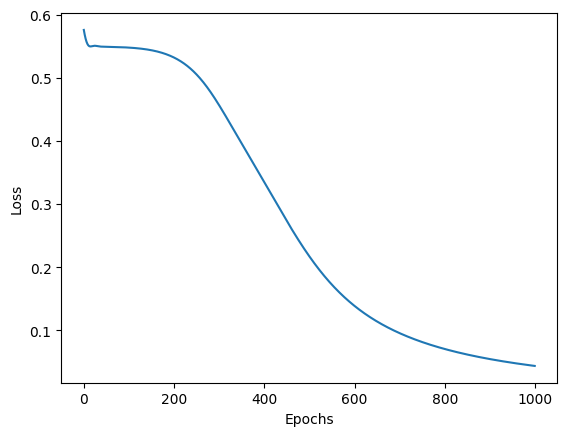

Training Losses are 
          0
0  0.851938
1  0.848491
2  0.845067
3  0.841668
4  0.838293
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


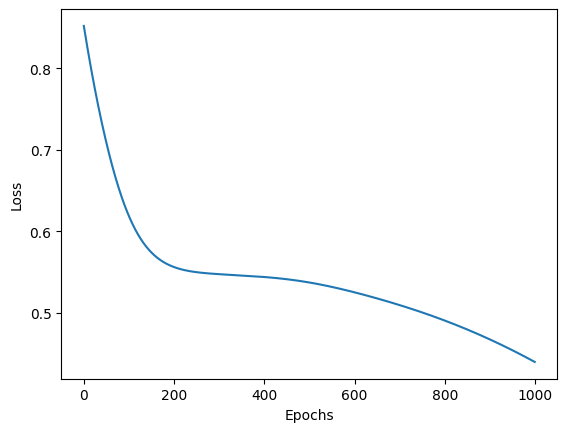

Training Losses are 
          0
0  0.712857
1  0.708818
2  0.704837
3  0.700914
4  0.697051
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3024   20]
 [ 115  841]]
Accuracy: 0.9663, Precision: 0.9768, Recall: 0.8797, F1-score: 0.9257

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3025   19]
 [ 112  844]]
Accuracy: 0.9673, Precision: 0.9780, Recall: 0.8828, F1-score: 0.9280



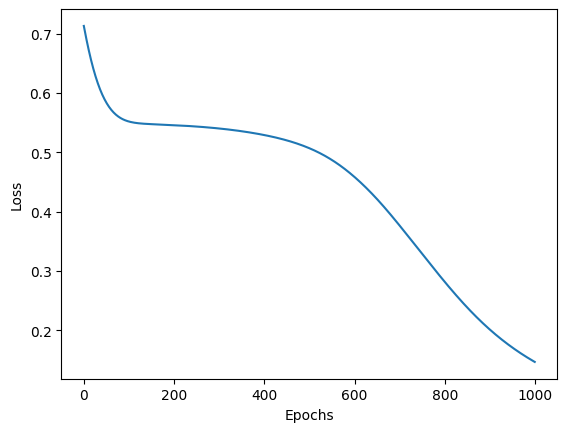

Training Losses are 
          0
0  0.603021
1  0.599340
2  0.595797
3  0.592394
4  0.589133
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3026   18]
 [  34  922]]
Accuracy: 0.9870, Precision: 0.9809, Recall: 0.9644, F1-score: 0.9726

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3027   17]
 [  28  928]]
Accuracy: 0.9888, Precision: 0.9820, Recall: 0.9707, F1-score: 0.9763



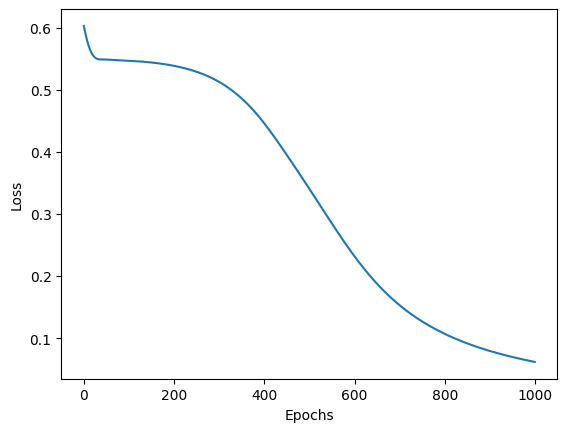

Training Losses are 
          0
0  0.656291
1  0.647076
2  0.638306
3  0.629987
4  0.622124
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3029   15]
 [  23  933]]
Accuracy: 0.9905, Precision: 0.9842, Recall: 0.9759, F1-score: 0.9800

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3031   13]
 [  18  938]]
Accuracy: 0.9922, Precision: 0.9863, Recall: 0.9812, F1-score: 0.9837



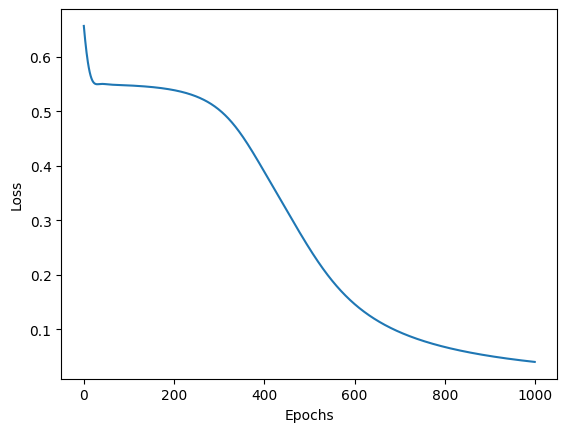

Training Losses are 
          0
0  0.646821
1  0.644251
2  0.641704
3  0.639181
4  0.636685
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3029   15]
 [ 130  826]]
Accuracy: 0.9637, Precision: 0.9822, Recall: 0.8640, F1-score: 0.9193

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3029   15]
 [ 126  830]]
Accuracy: 0.9647, Precision: 0.9822, Recall: 0.8682, F1-score: 0.9217



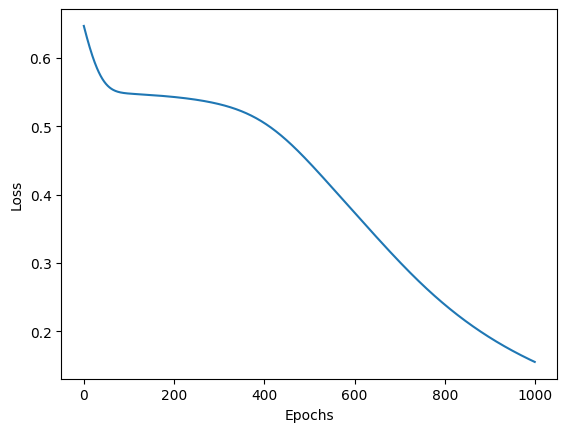

Training Losses are 
          0
0  0.664793
1  0.660765
2  0.656818
3  0.652953
4  0.649171
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3028   16]
 [  33  923]]
Accuracy: 0.9878, Precision: 0.9830, Recall: 0.9655, F1-score: 0.9741

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3026   18]
 [  29  927]]
Accuracy: 0.9882, Precision: 0.9810, Recall: 0.9697, F1-score: 0.9753



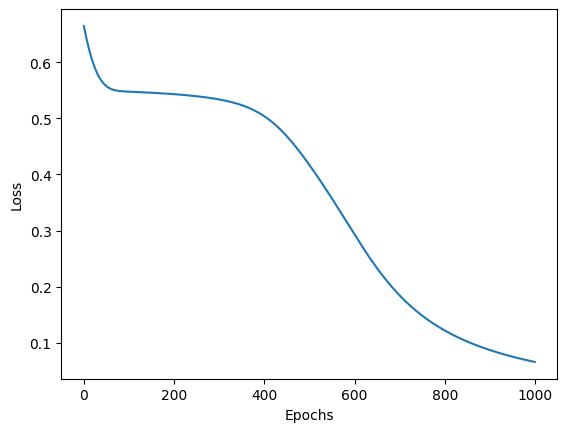

Training Losses are 
          0
0  0.668587
1  0.661759
2  0.655137
3  0.648725
4  0.642528
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3028   16]
 [  24  932]]
Accuracy: 0.9900, Precision: 0.9831, Recall: 0.9749, F1-score: 0.9790

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3031   13]
 [  17  939]]
Accuracy: 0.9925, Precision: 0.9863, Recall: 0.9822, F1-score: 0.9843



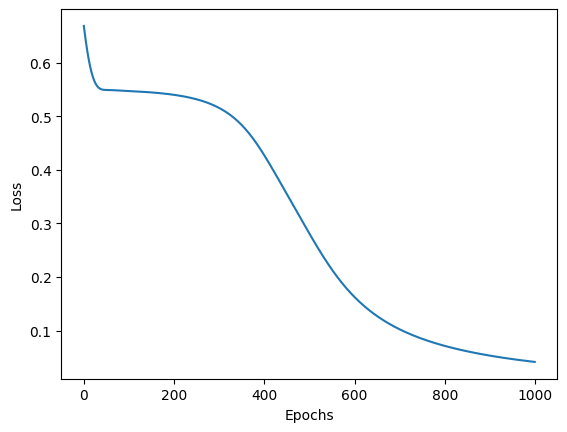

Training Losses are 
          0
0  0.799526
1  0.783182
2  0.767432
3  0.752287
4  0.737754
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3028   16]
 [  27  929]]
Accuracy: 0.9892, Precision: 0.9831, Recall: 0.9718, F1-score: 0.9774

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3027   17]
 [  23  933]]
Accuracy: 0.9900, Precision: 0.9821, Recall: 0.9759, F1-score: 0.9790



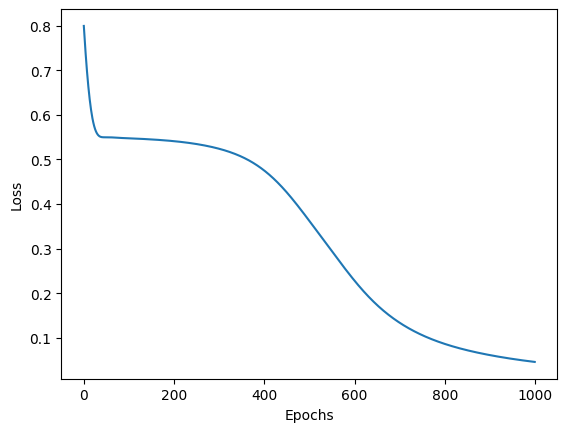

Training Losses are 
          0
0  0.690682
1  0.686811
2  0.683003
3  0.679262
4  0.675590
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3022   22]
 [  45  911]]
Accuracy: 0.9832, Precision: 0.9764, Recall: 0.9529, F1-score: 0.9645

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3025   19]
 [  44  912]]
Accuracy: 0.9842, Precision: 0.9796, Recall: 0.9540, F1-score: 0.9666



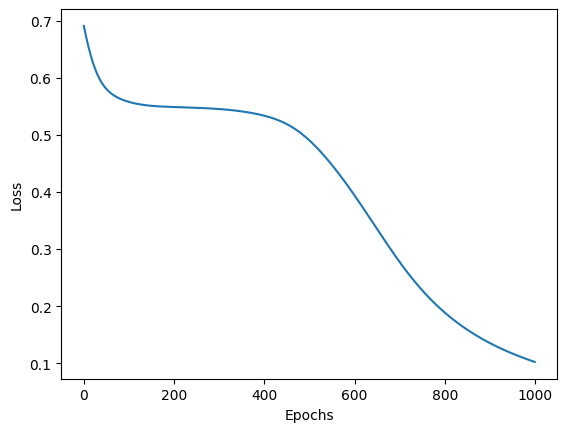

Training Losses are 
          0
0  0.634729
1  0.629496
2  0.624422
3  0.619511
4  0.614768
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3028   16]
 [  23  933]]
Accuracy: 0.9902, Precision: 0.9831, Recall: 0.9759, F1-score: 0.9795

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3032   12]
 [  16  940]]
Accuracy: 0.9930, Precision: 0.9874, Recall: 0.9833, F1-score: 0.9853



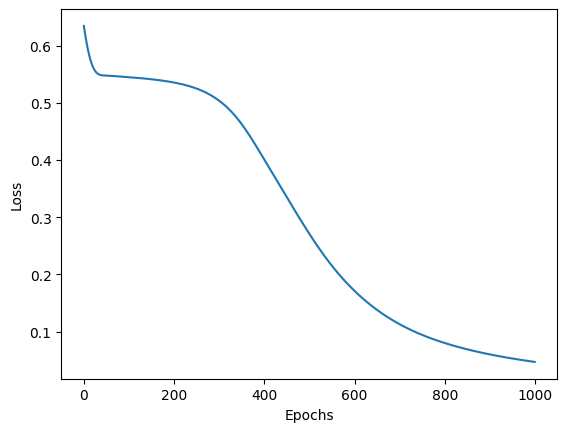

Training Losses are 
          0
0  0.595138
1  0.589127
2  0.583566
3  0.578459
4  0.573810
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3035    9]
 [   7  949]]
Accuracy: 0.9960, Precision: 0.9906, Recall: 0.9927, F1-score: 0.9916



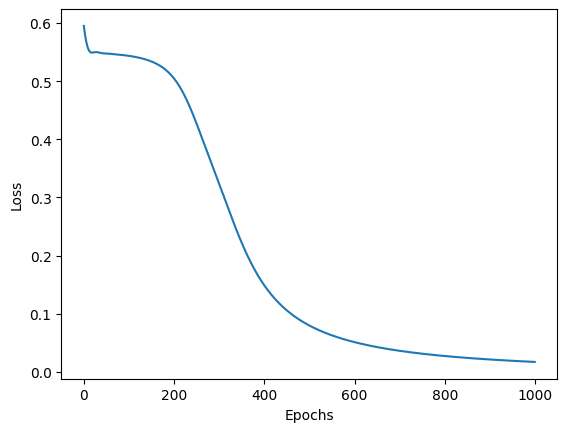

Training Losses are 
          0
0  0.569618
1  0.563840
2  0.559104
3  0.555392
4  0.552662
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3040    4]
 [   4  952]]
Accuracy: 0.9980, Precision: 0.9958, Recall: 0.9958, F1-score: 0.9958



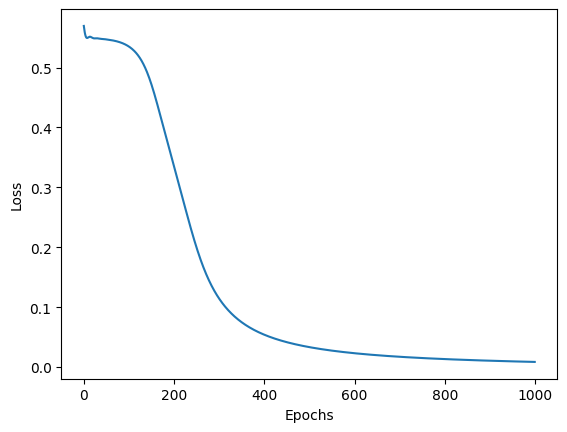

Best accuracy for test data is 0.998 for degree 64 & 64


In [31]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [32]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.637940
1  0.636483
2  0.635038
3  0.633606
4  0.632188
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 908   48]]
Accuracy: 0.7730, Precision: 1.0000, Recall: 0.0502, F1-score: 0.0956

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 895   61]]
Accuracy: 0.7762, Precision: 1.0000, Recall: 0.0638, F1-score: 0.1200



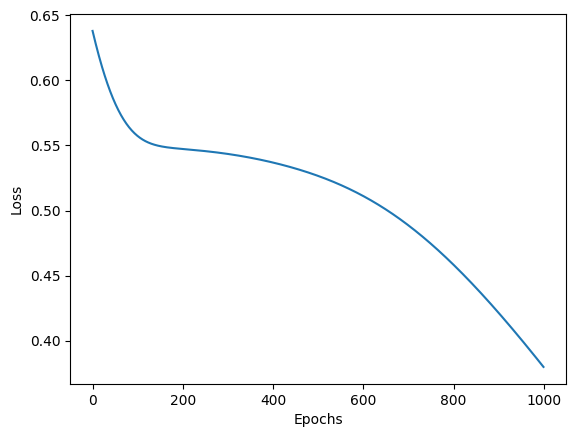

Training Losses are 
          0
0  0.671995
1  0.670314
2  0.668647
3  0.666995
4  0.665358
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3042    2]
 [ 629  327]]
Accuracy: 0.8423, Precision: 0.9939, Recall: 0.3421, F1-score: 0.5089

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3042    2]
 [ 643  313]]
Accuracy: 0.8387, Precision: 0.9937, Recall: 0.3274, F1-score: 0.4925



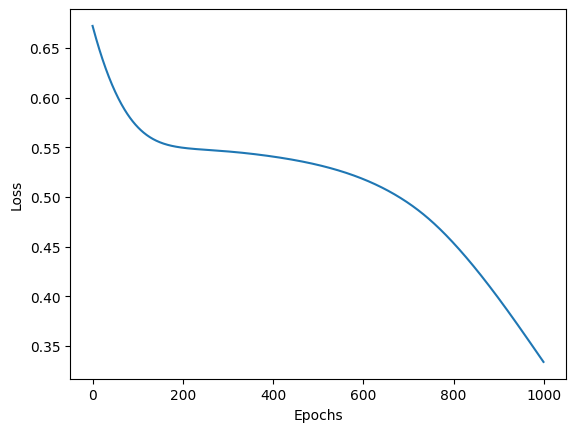

Training Losses are 
          0
0  0.763045
1  0.760442
2  0.757850
3  0.755270
4  0.752703
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


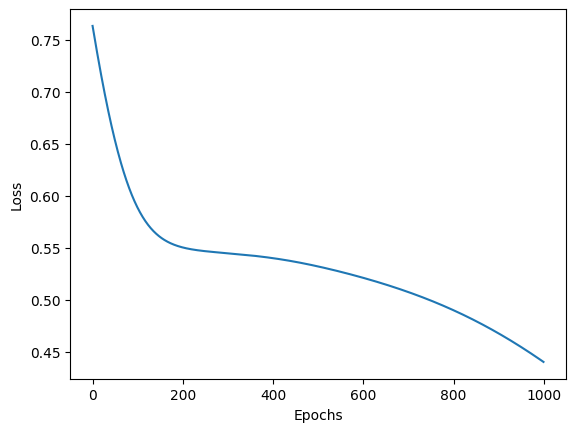

Training Losses are 
          0
0  0.725063
1  0.723014
2  0.720978
3  0.718954
4  0.716942
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 802  154]]
Accuracy: 0.7995, Precision: 1.0000, Recall: 0.1611, F1-score: 0.2775

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3043    1]
 [ 800  156]]
Accuracy: 0.7997, Precision: 0.9936, Recall: 0.1632, F1-score: 0.2803



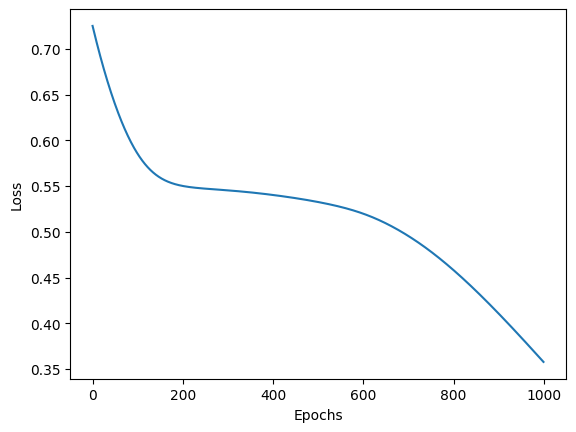

Training Losses are 
          0
0  0.580609
1  0.579310
2  0.578039
3  0.576796
4  0.575581
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3029   15]
 [  62  894]]
Accuracy: 0.9808, Precision: 0.9835, Recall: 0.9351, F1-score: 0.9587

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3027   17]
 [  54  902]]
Accuracy: 0.9822, Precision: 0.9815, Recall: 0.9435, F1-score: 0.9621



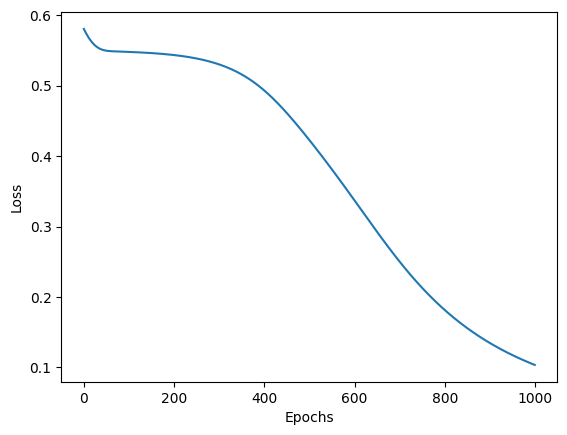

Training Losses are 
          0
0  0.685875
1  0.682736
2  0.679637
3  0.676578
4  0.673560
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3027   17]
 [ 229  727]]
Accuracy: 0.9385, Precision: 0.9772, Recall: 0.7605, F1-score: 0.8553

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3029   15]
 [ 218  738]]
Accuracy: 0.9417, Precision: 0.9801, Recall: 0.7720, F1-score: 0.8637



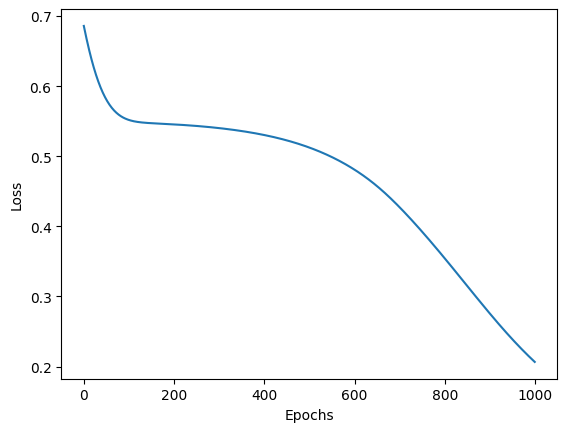

Training Losses are 
          0
0  0.699728
1  0.696720
2  0.693745
3  0.690802
4  0.687891
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3030   14]
 [ 284  672]]
Accuracy: 0.9255, Precision: 0.9796, Recall: 0.7029, F1-score: 0.8185

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3029   15]
 [ 284  672]]
Accuracy: 0.9253, Precision: 0.9782, Recall: 0.7029, F1-score: 0.8180



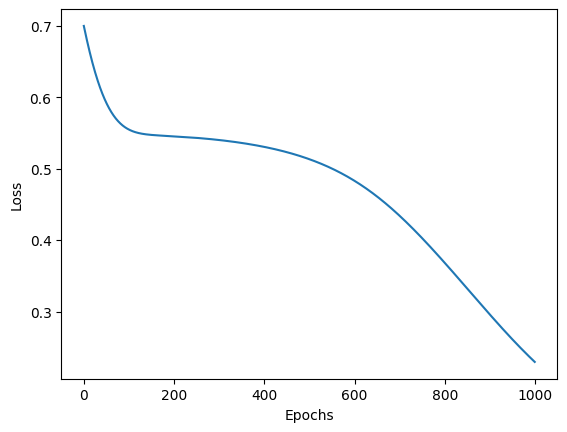

Training Losses are 
          0
0  0.812652
1  0.808308
2  0.804005
3  0.799743
4  0.795523
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3042    2]
 [ 649  307]]
Accuracy: 0.8373, Precision: 0.9935, Recall: 0.3211, F1-score: 0.4854

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3040    4]
 [ 661  295]]
Accuracy: 0.8337, Precision: 0.9866, Recall: 0.3086, F1-score: 0.4701



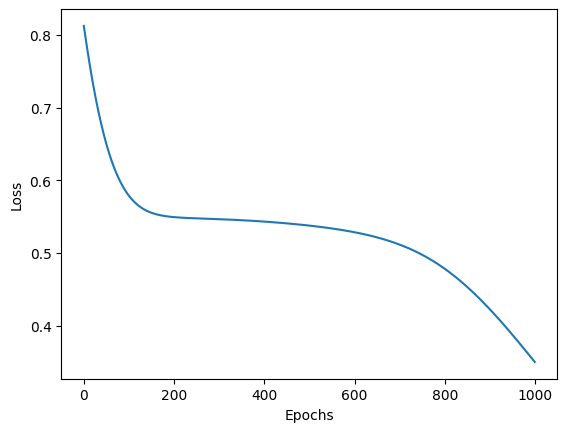

Training Losses are 
          0
0  0.615037
1  0.611431
2  0.607935
3  0.604553
4  0.601284
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3027   17]
 [  38  918]]
Accuracy: 0.9862, Precision: 0.9818, Recall: 0.9603, F1-score: 0.9709

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3028   16]
 [  29  927]]
Accuracy: 0.9888, Precision: 0.9830, Recall: 0.9697, F1-score: 0.9763



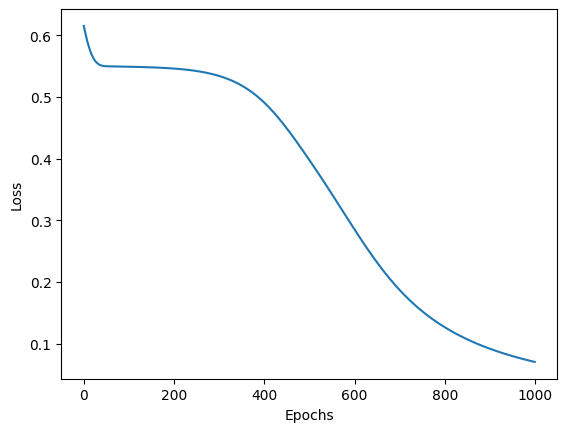

Training Losses are 
          0
0  0.765001
1  0.758282
2  0.751678
3  0.745192
4  0.738824
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3020   24]
 [ 162  794]]
Accuracy: 0.9535, Precision: 0.9707, Recall: 0.8305, F1-score: 0.8952

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3025   19]
 [ 157  799]]
Accuracy: 0.9560, Precision: 0.9768, Recall: 0.8358, F1-score: 0.9008



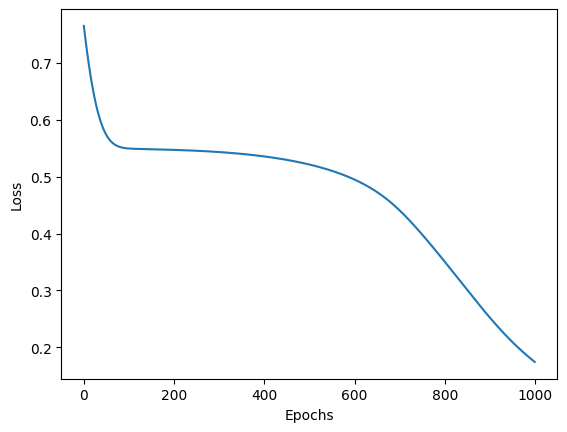

Training Losses are 
          0
0  0.818812
1  0.811360
2  0.804025
3  0.796808
4  0.789711
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3026   18]
 [ 266  690]]
Accuracy: 0.9290, Precision: 0.9746, Recall: 0.7218, F1-score: 0.8293

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3022   22]
 [ 252  704]]
Accuracy: 0.9315, Precision: 0.9697, Recall: 0.7364, F1-score: 0.8371



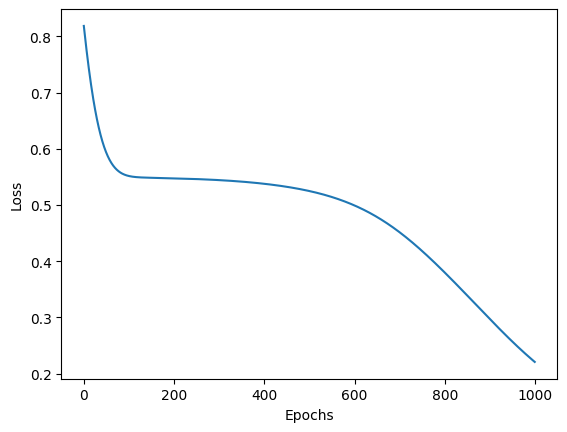

Training Losses are 
          0
0  0.628296
1  0.624327
2  0.620469
3  0.616723
4  0.613091
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3024   20]
 [  49  907]]
Accuracy: 0.9828, Precision: 0.9784, Recall: 0.9487, F1-score: 0.9634

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3026   18]
 [  41  915]]
Accuracy: 0.9852, Precision: 0.9807, Recall: 0.9571, F1-score: 0.9688



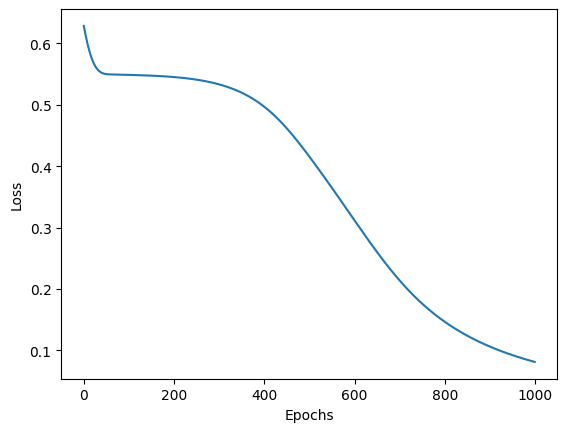

Training Losses are 
          0
0  0.819364
1  0.805690
2  0.792383
3  0.779450
4  0.766898
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3021   23]
 [  74  882]]
Accuracy: 0.9758, Precision: 0.9746, Recall: 0.9226, F1-score: 0.9479

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3025   19]
 [  65  891]]
Accuracy: 0.9790, Precision: 0.9791, Recall: 0.9320, F1-score: 0.9550



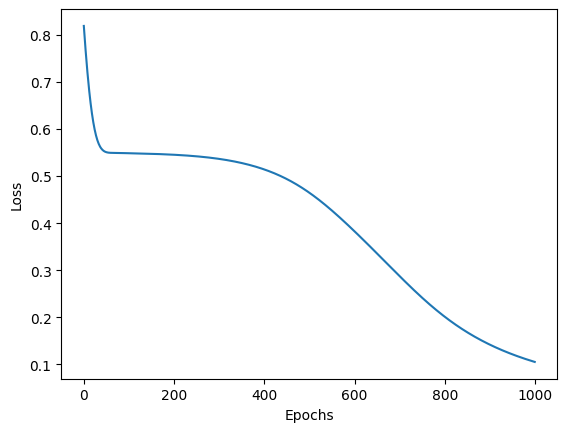

Training Losses are 
          0
0  0.847368
1  0.832339
2  0.817719
3  0.803513
4  0.789729
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3022   22]
 [  87  869]]
Accuracy: 0.9728, Precision: 0.9753, Recall: 0.9090, F1-score: 0.9410

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3025   19]
 [  84  872]]
Accuracy: 0.9742, Precision: 0.9787, Recall: 0.9121, F1-score: 0.9442



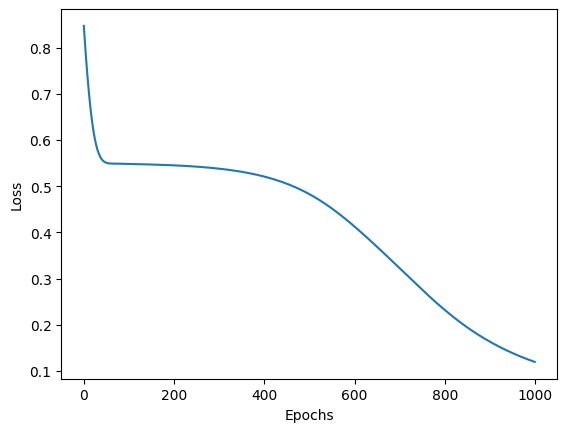

Training Losses are 
          0
0  0.596898
1  0.591492
2  0.586440
3  0.581745
4  0.577407
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3030   14]
 [  22  934]]
Accuracy: 0.9910, Precision: 0.9852, Recall: 0.9770, F1-score: 0.9811

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3032   12]
 [  14  942]]
Accuracy: 0.9935, Precision: 0.9874, Recall: 0.9854, F1-score: 0.9864



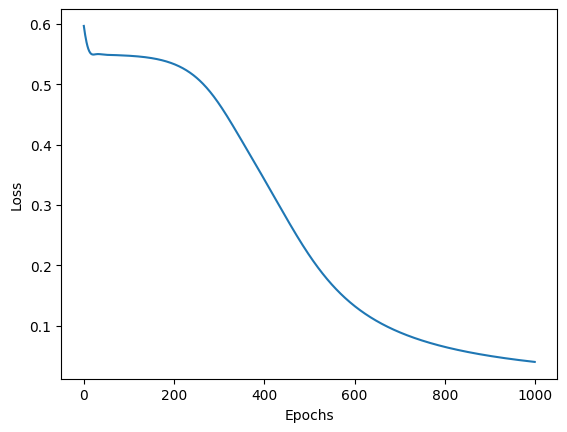

Training Losses are 
          0
0  0.601580
1  0.595764
2  0.590325
3  0.585265
4  0.580586
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3028   16]
 [  27  929]]
Accuracy: 0.9892, Precision: 0.9831, Recall: 0.9718, F1-score: 0.9774

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3030   14]
 [  19  937]]
Accuracy: 0.9918, Precision: 0.9853, Recall: 0.9801, F1-score: 0.9827



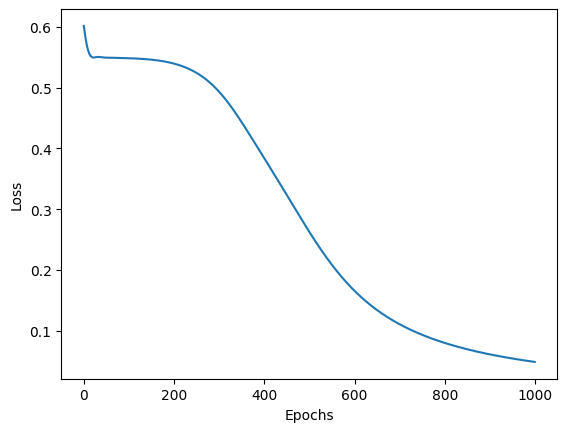

Training Losses are 
          0
0  0.591488
1  0.590402
2  0.589332
3  0.588277
4  0.587238
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3026   18]
 [  67  889]]
Accuracy: 0.9788, Precision: 0.9802, Recall: 0.9299, F1-score: 0.9544

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3026   18]
 [  60  896]]
Accuracy: 0.9805, Precision: 0.9803, Recall: 0.9372, F1-score: 0.9583



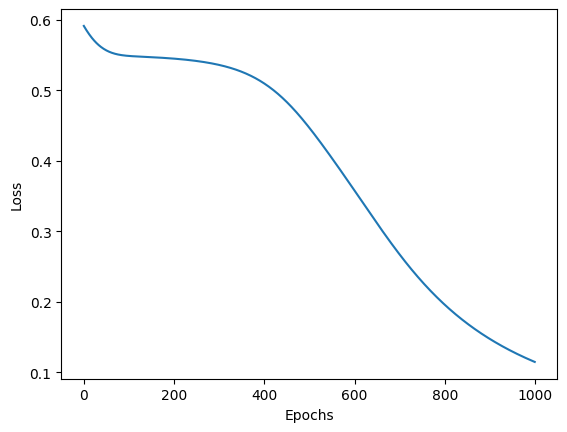

Training Losses are 
          0
0  0.612117
1  0.610478
2  0.608858
3  0.607259
4  0.605681
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3028   16]
 [  97  859]]
Accuracy: 0.9718, Precision: 0.9817, Recall: 0.8985, F1-score: 0.9383

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3029   15]
 [  93  863]]
Accuracy: 0.9730, Precision: 0.9829, Recall: 0.9027, F1-score: 0.9411



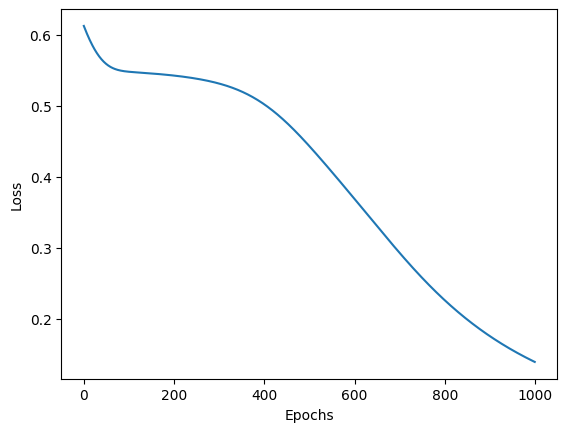

Training Losses are 
          0
0  0.789017
1  0.786210
2  0.783423
3  0.780656
4  0.777909
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 953    3]]
Accuracy: 0.7618, Precision: 1.0000, Recall: 0.0031, F1-score: 0.0063



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


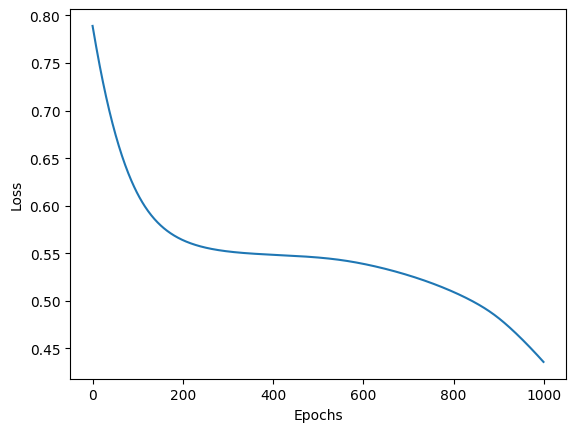

Training Losses are 
          0
0  0.727181
1  0.724922
2  0.722675
3  0.720440
4  0.718219
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3041    3]
 [ 452  504]]
Accuracy: 0.8862, Precision: 0.9941, Recall: 0.5272, F1-score: 0.6890

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3041    3]
 [ 440  516]]
Accuracy: 0.8892, Precision: 0.9942, Recall: 0.5397, F1-score: 0.6997



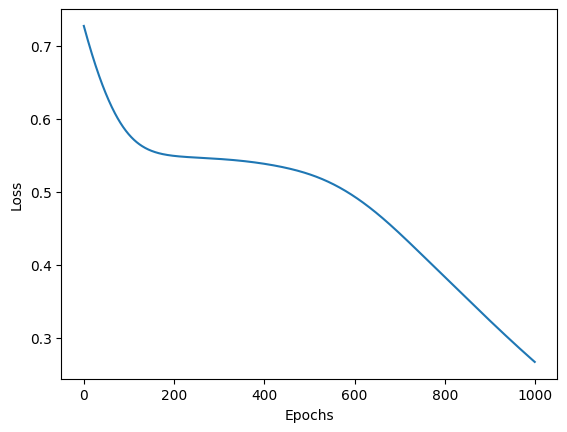

Training Losses are 
          0
0  0.650936
1  0.647945
2  0.644998
3  0.642094
4  0.639236
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3026   18]
 [  99  857]]
Accuracy: 0.9708, Precision: 0.9794, Recall: 0.8964, F1-score: 0.9361

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3025   19]
 [  97  859]]
Accuracy: 0.9710, Precision: 0.9784, Recall: 0.8985, F1-score: 0.9368



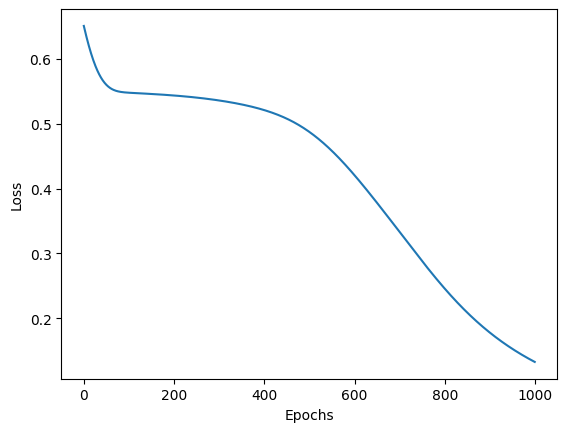

Training Losses are 
          0
0  0.907981
1  0.902539
2  0.897149
3  0.891811
4  0.886527
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3042    2]
 [ 676  280]]
Accuracy: 0.8305, Precision: 0.9929, Recall: 0.2929, F1-score: 0.4523

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3042    2]
 [ 680  276]]
Accuracy: 0.8295, Precision: 0.9928, Recall: 0.2887, F1-score: 0.4473



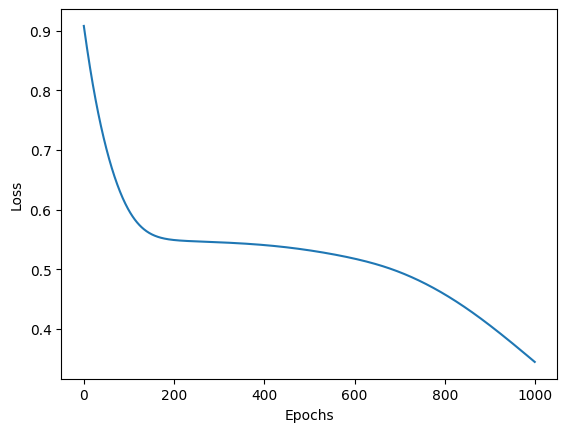

Training Losses are 
          0
0  0.773218
1  0.768244
2  0.763331
3  0.758480
4  0.753691
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3027   17]
 [ 374  582]]
Accuracy: 0.9022, Precision: 0.9716, Recall: 0.6088, F1-score: 0.7486

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3026   18]
 [ 350  606]]
Accuracy: 0.9080, Precision: 0.9712, Recall: 0.6339, F1-score: 0.7671



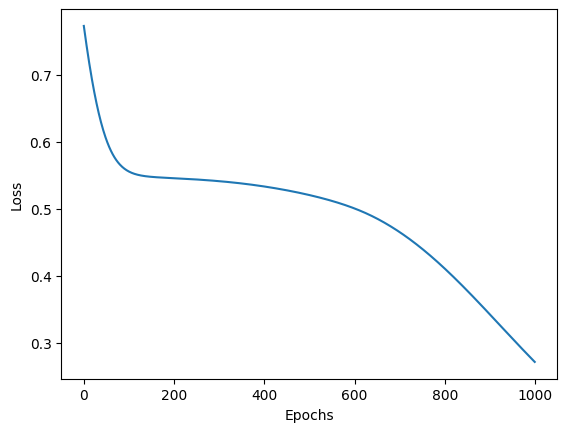

Training Losses are 
          0
0  0.573023
1  0.571602
2  0.570224
3  0.568889
4  0.567600
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3027   17]
 [  75  881]]
Accuracy: 0.9770, Precision: 0.9811, Recall: 0.9215, F1-score: 0.9504

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3027   17]
 [  66  890]]
Accuracy: 0.9792, Precision: 0.9813, Recall: 0.9310, F1-score: 0.9554



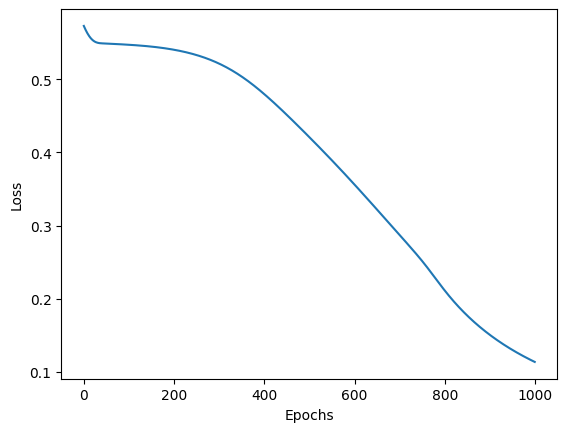

Training Losses are 
          0
0  0.702233
1  0.696112
2  0.690129
3  0.684287
4  0.678587
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3024   20]
 [  91  865]]
Accuracy: 0.9722, Precision: 0.9774, Recall: 0.9048, F1-score: 0.9397

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3026   18]
 [  89  867]]
Accuracy: 0.9732, Precision: 0.9797, Recall: 0.9069, F1-score: 0.9419



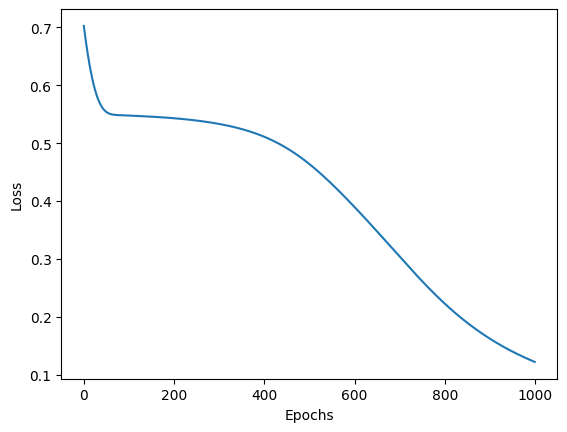

Training Losses are 
          0
0  0.600280
1  0.596737
2  0.593333
3  0.590069
4  0.586945
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3027   17]
 [  33  923]]
Accuracy: 0.9875, Precision: 0.9819, Recall: 0.9655, F1-score: 0.9736

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3027   17]
 [  28  928]]
Accuracy: 0.9888, Precision: 0.9820, Recall: 0.9707, F1-score: 0.9763



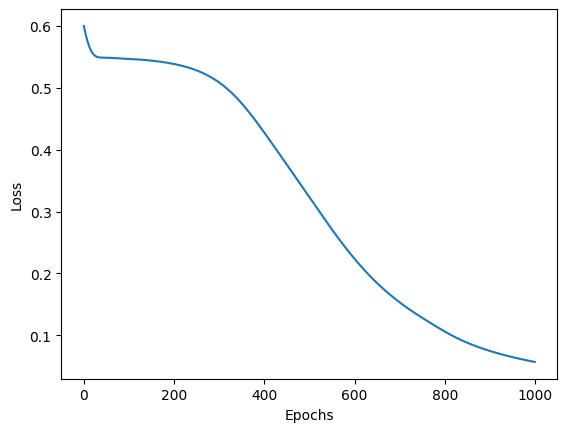

Training Losses are 
          0
0  0.644400
1  0.639724
2  0.635171
3  0.630741
4  0.626437
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3027   17]
 [  35  921]]
Accuracy: 0.9870, Precision: 0.9819, Recall: 0.9634, F1-score: 0.9725

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3026   18]
 [  29  927]]
Accuracy: 0.9882, Precision: 0.9810, Recall: 0.9697, F1-score: 0.9753



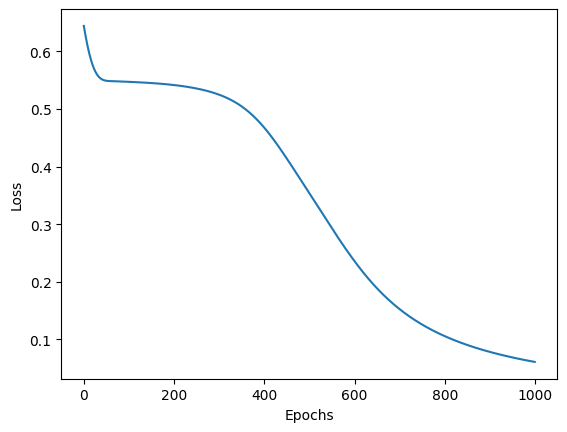

Training Losses are 
          0
0  0.776263
1  0.768805
2  0.761484
3  0.754300
4  0.747258
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3024   20]
 [ 117  839]]
Accuracy: 0.9657, Precision: 0.9767, Recall: 0.8776, F1-score: 0.9245

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3025   19]
 [ 117  839]]
Accuracy: 0.9660, Precision: 0.9779, Recall: 0.8776, F1-score: 0.9250



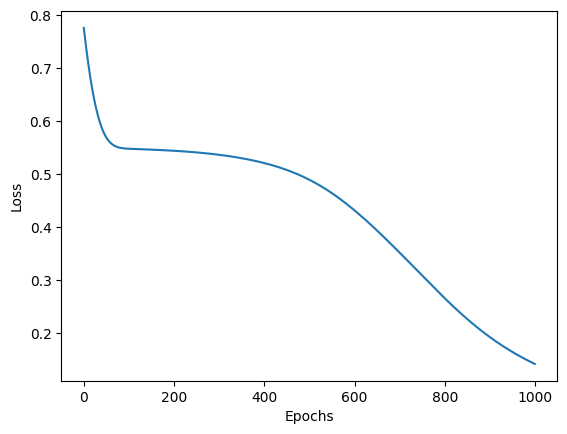

Training Losses are 
          0
0  0.697720
1  0.686698
2  0.676144
3  0.666063
4  0.656459
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3028   16]
 [  26  930]]
Accuracy: 0.9895, Precision: 0.9831, Recall: 0.9728, F1-score: 0.9779

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3031   13]
 [  18  938]]
Accuracy: 0.9922, Precision: 0.9863, Recall: 0.9812, F1-score: 0.9837



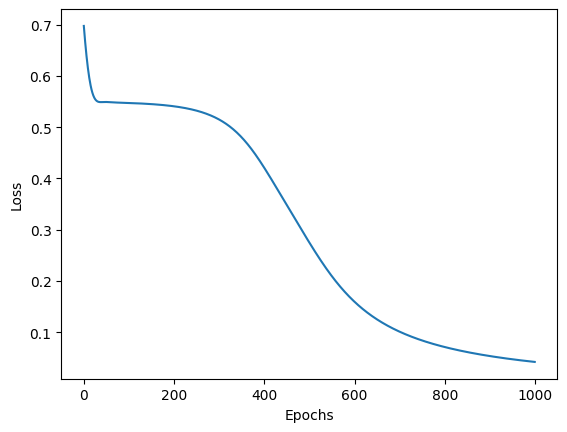

Training Losses are 
          0
0  0.583223
1  0.578140
2  0.573514
3  0.569345
4  0.565631
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3034   10]
 [  12  944]]
Accuracy: 0.9945, Precision: 0.9895, Recall: 0.9874, F1-score: 0.9885



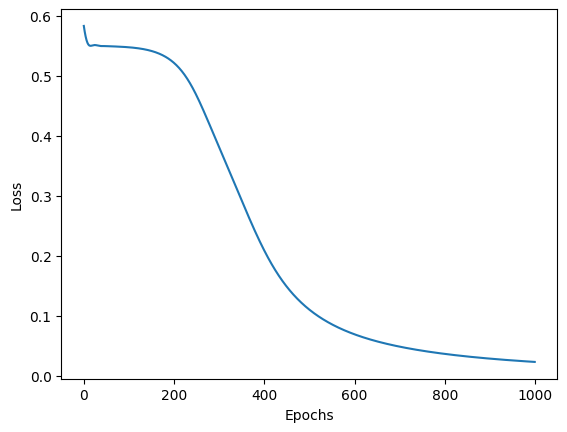

Training Losses are 
          0
0  0.695654
1  0.684449
2  0.673725
3  0.663491
4  0.653753
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3028   16]
 [  26  930]]
Accuracy: 0.9895, Precision: 0.9831, Recall: 0.9728, F1-score: 0.9779

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3030   14]
 [  19  937]]
Accuracy: 0.9918, Precision: 0.9853, Recall: 0.9801, F1-score: 0.9827



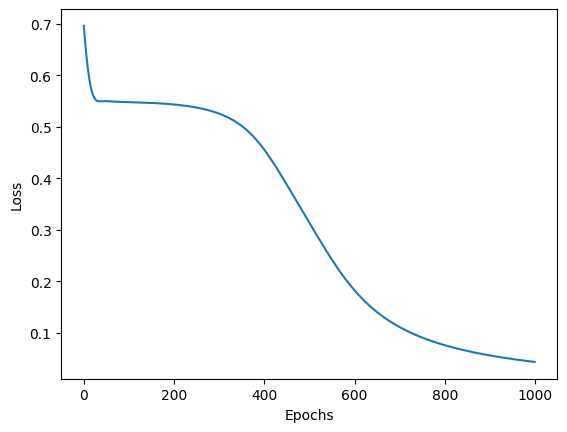

Training Losses are 
          0
0  0.675916
1  0.666025
2  0.656563
3  0.647536
4  0.638949
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3028   16]
 [  28  928]]
Accuracy: 0.9890, Precision: 0.9831, Recall: 0.9707, F1-score: 0.9768

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3029   15]
 [  23  933]]
Accuracy: 0.9905, Precision: 0.9842, Recall: 0.9759, F1-score: 0.9800



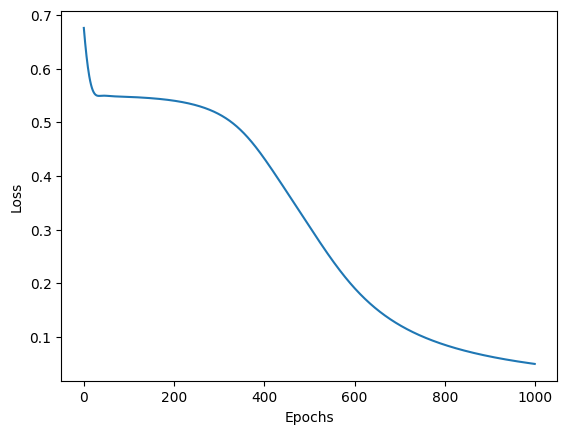

Training Losses are 
          0
0  0.627912
1  0.625713
2  0.623540
3  0.621395
4  0.619277
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3030   14]
 [  92  864]]
Accuracy: 0.9735, Precision: 0.9841, Recall: 0.9038, F1-score: 0.9422

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3031   13]
 [  87  869]]
Accuracy: 0.9750, Precision: 0.9853, Recall: 0.9090, F1-score: 0.9456



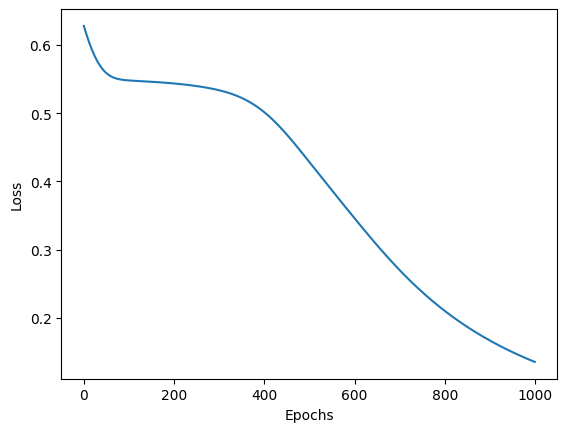

Training Losses are 
          0
0  0.818636
1  0.814313
2  0.810031
3  0.805793
4  0.801598
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3035    9]
 [ 458  498]]
Accuracy: 0.8832, Precision: 0.9822, Recall: 0.5209, F1-score: 0.6808

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3034   10]
 [ 446  510]]
Accuracy: 0.8860, Precision: 0.9808, Recall: 0.5335, F1-score: 0.6911



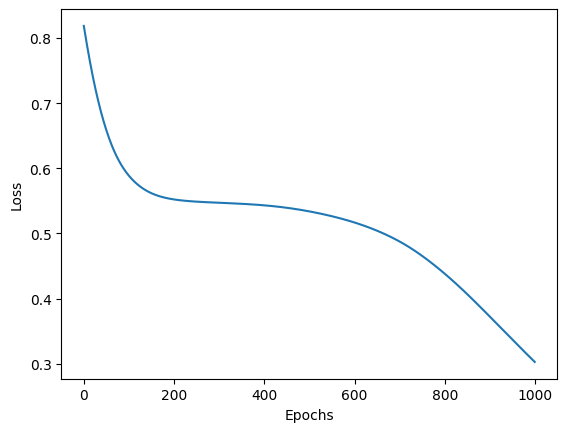

Training Losses are 
          0
0  0.747024
1  0.743059
2  0.739138
3  0.735263
4  0.731434
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3027   17]
 [ 277  679]]
Accuracy: 0.9265, Precision: 0.9756, Recall: 0.7103, F1-score: 0.8220

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3022   22]
 [ 261  695]]
Accuracy: 0.9293, Precision: 0.9693, Recall: 0.7270, F1-score: 0.8308



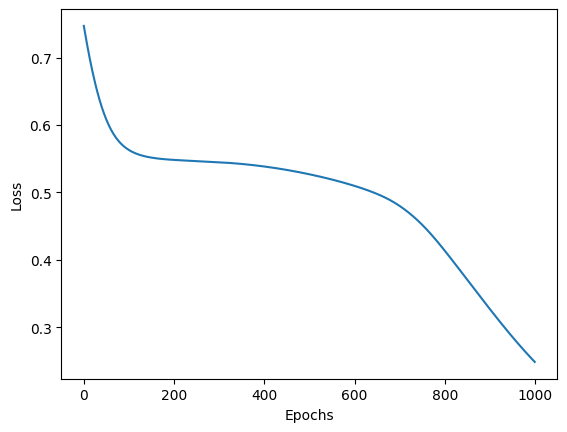

Training Losses are 
          0
0  0.552798
1  0.552407
2  0.552042
3  0.551703
4  0.551392
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3034   10]
 [  16  940]]
Accuracy: 0.9935, Precision: 0.9895, Recall: 0.9833, F1-score: 0.9864

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890



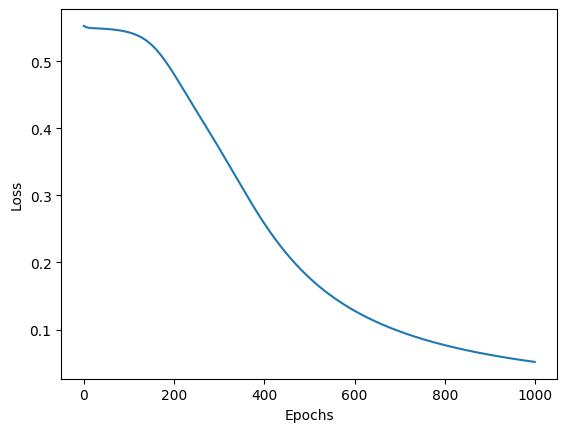

Training Losses are 
          0
0  0.773444
1  0.767918
2  0.762467
3  0.757094
4  0.751799
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3019   25]
 [ 126  830]]
Accuracy: 0.9623, Precision: 0.9708, Recall: 0.8682, F1-score: 0.9166

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3020   24]
 [ 127  829]]
Accuracy: 0.9623, Precision: 0.9719, Recall: 0.8672, F1-score: 0.9165



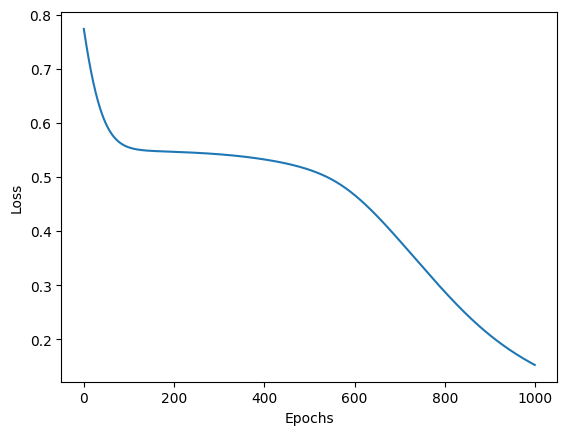

Training Losses are 
          0
0  0.661274
1  0.656995
2  0.652801
3  0.648691
4  0.644668
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3027   17]
 [  37  919]]
Accuracy: 0.9865, Precision: 0.9818, Recall: 0.9613, F1-score: 0.9715

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3026   18]
 [  35  921]]
Accuracy: 0.9868, Precision: 0.9808, Recall: 0.9634, F1-score: 0.9720



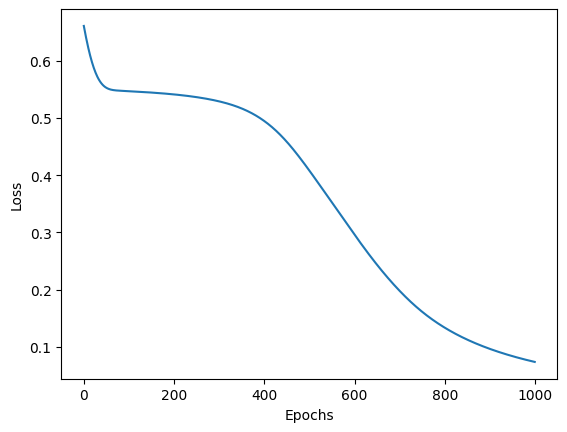

Training Losses are 
          0
0  0.918501
1  0.910200
2  0.902027
3  0.893979
4  0.886056
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3024   20]
 [ 336  620]]
Accuracy: 0.9110, Precision: 0.9688, Recall: 0.6485, F1-score: 0.7769

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3024   20]
 [ 307  649]]
Accuracy: 0.9183, Precision: 0.9701, Recall: 0.6789, F1-score: 0.7988



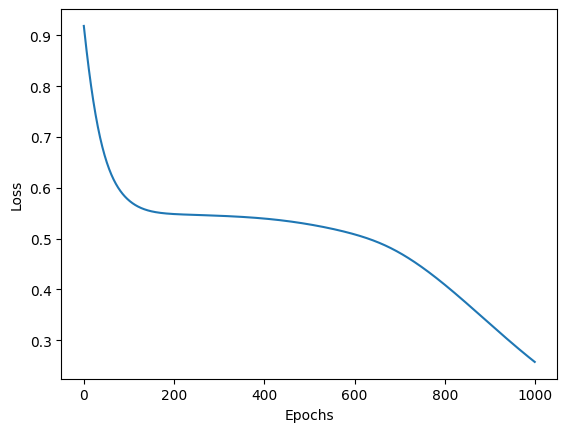

Training Losses are 
          0
0  0.723084
1  0.717810
2  0.712621
3  0.707518
4  0.702504
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3022   22]
 [  68  888]]
Accuracy: 0.9775, Precision: 0.9758, Recall: 0.9289, F1-score: 0.9518

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3024   20]
 [  68  888]]
Accuracy: 0.9780, Precision: 0.9780, Recall: 0.9289, F1-score: 0.9528



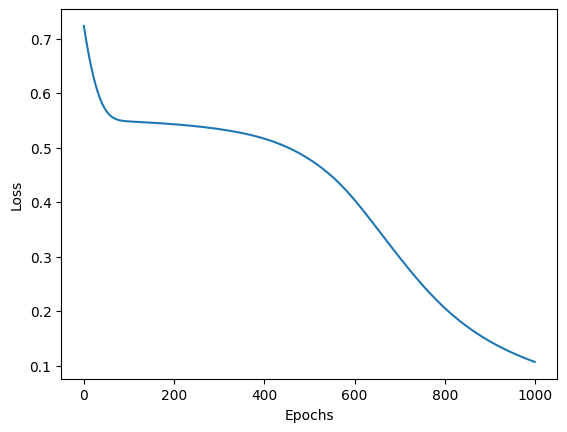

Training Losses are 
          0
0  0.653112
1  0.646495
2  0.640110
3  0.633963
4  0.628056
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3028   16]
 [  25  931]]
Accuracy: 0.9898, Precision: 0.9831, Recall: 0.9738, F1-score: 0.9785

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3029   15]
 [  18  938]]
Accuracy: 0.9918, Precision: 0.9843, Recall: 0.9812, F1-score: 0.9827



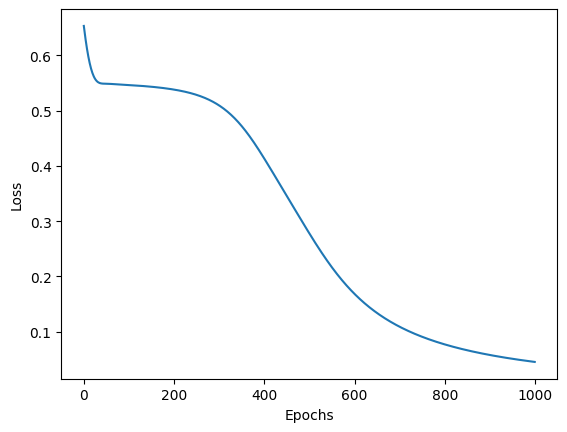

Training Losses are 
          0
0  0.680787
1  0.673216
2  0.665875
3  0.658770
4  0.651904
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3028   16]
 [  29  927]]
Accuracy: 0.9888, Precision: 0.9830, Recall: 0.9697, F1-score: 0.9763

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3028   16]
 [  22  934]]
Accuracy: 0.9905, Precision: 0.9832, Recall: 0.9770, F1-score: 0.9801



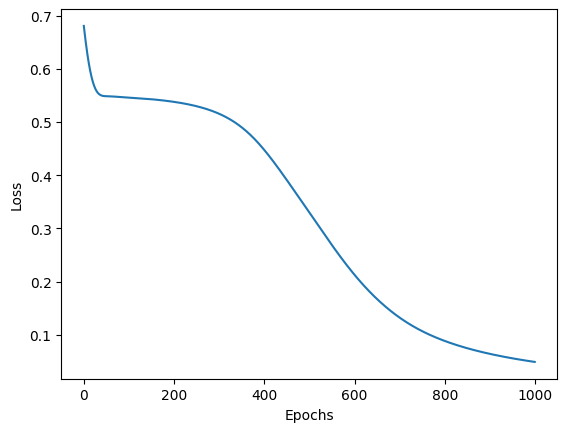

Training Losses are 
          0
0  0.715998
1  0.707671
2  0.699581
3  0.691733
4  0.684128
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3026   18]
 [  37  919]]
Accuracy: 0.9862, Precision: 0.9808, Recall: 0.9613, F1-score: 0.9709

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3026   18]
 [  34  922]]
Accuracy: 0.9870, Precision: 0.9809, Recall: 0.9644, F1-score: 0.9726



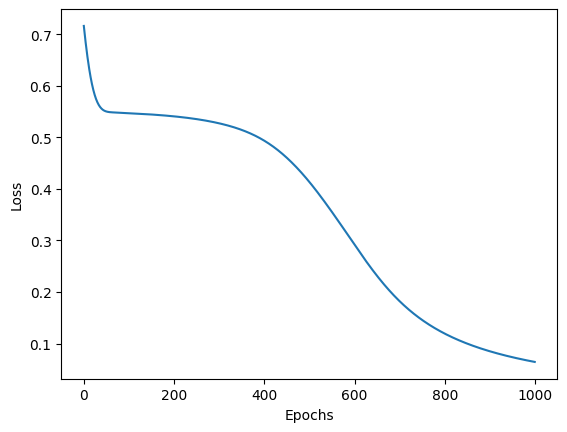

Training Losses are 
          0
0  0.723738
1  0.715171
2  0.706839
3  0.698744
4  0.690890
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3027   17]
 [  33  923]]
Accuracy: 0.9875, Precision: 0.9819, Recall: 0.9655, F1-score: 0.9736

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3026   18]
 [  29  927]]
Accuracy: 0.9882, Precision: 0.9810, Recall: 0.9697, F1-score: 0.9753



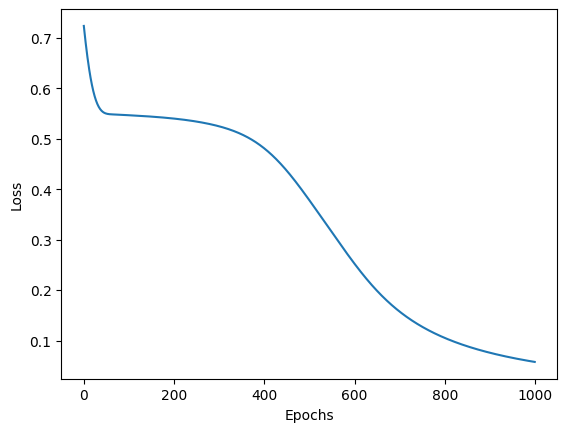

Training Losses are 
          0
0  0.749548
1  0.734472
2  0.720040
3  0.706260
4  0.693135
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3029   15]
 [  23  933]]
Accuracy: 0.9905, Precision: 0.9842, Recall: 0.9759, F1-score: 0.9800

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3031   13]
 [  16  940]]
Accuracy: 0.9928, Precision: 0.9864, Recall: 0.9833, F1-score: 0.9848



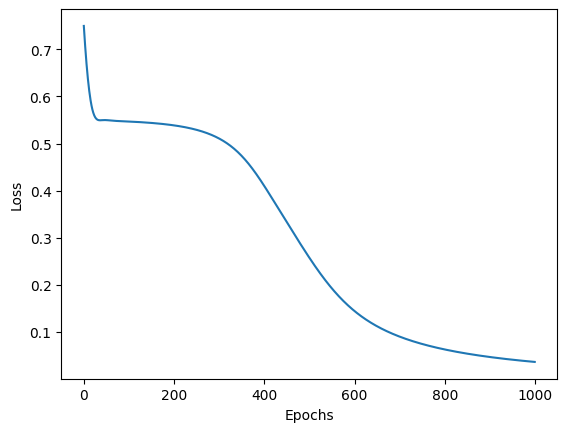

Training Losses are 
          0
0  0.577104
1  0.571819
2  0.567134
3  0.563051
4  0.559564
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



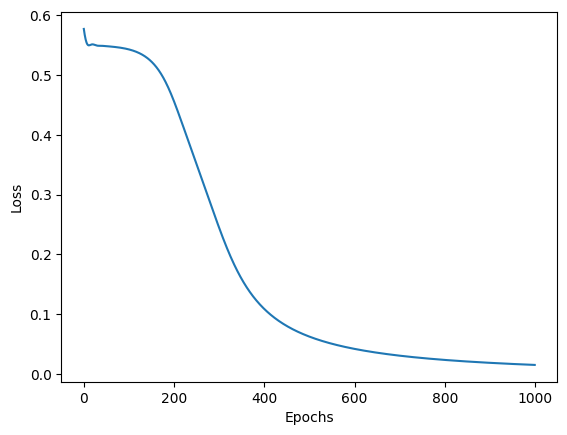

Training Losses are 
          0
0  0.680046
1  0.667870
2  0.656349
3  0.645490
4  0.635295
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3030   14]
 [  20  936]]
Accuracy: 0.9915, Precision: 0.9853, Recall: 0.9791, F1-score: 0.9822

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3032   12]
 [  14  942]]
Accuracy: 0.9935, Precision: 0.9874, Recall: 0.9854, F1-score: 0.9864



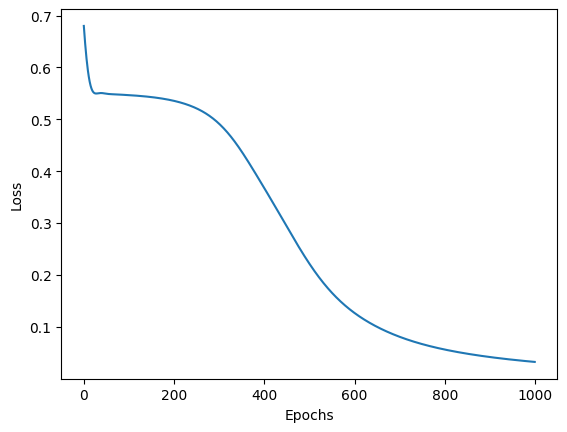

Training Losses are 
          0
0  0.680341
1  0.667978
2  0.656291
3  0.645286
4  0.634964
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3031   13]
 [  17  939]]
Accuracy: 0.9925, Precision: 0.9863, Recall: 0.9822, F1-score: 0.9843

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3033   11]
 [  13  943]]
Accuracy: 0.9940, Precision: 0.9885, Recall: 0.9864, F1-score: 0.9874



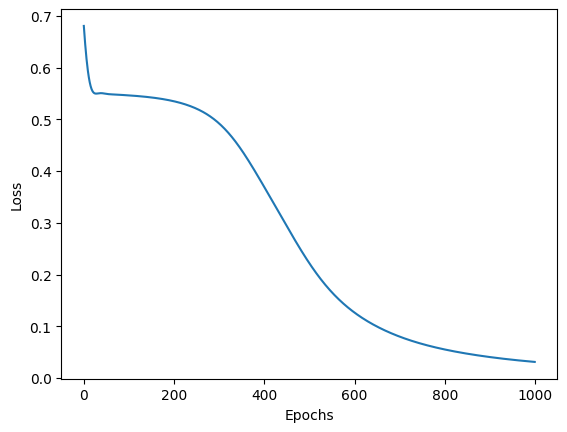

Training Losses are 
          0
0  0.716955
1  0.711797
2  0.706724
3  0.701742
4  0.696852
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3022   22]
 [  56  900]]
Accuracy: 0.9805, Precision: 0.9761, Recall: 0.9414, F1-score: 0.9585

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3025   19]
 [  53  903]]
Accuracy: 0.9820, Precision: 0.9794, Recall: 0.9446, F1-score: 0.9617



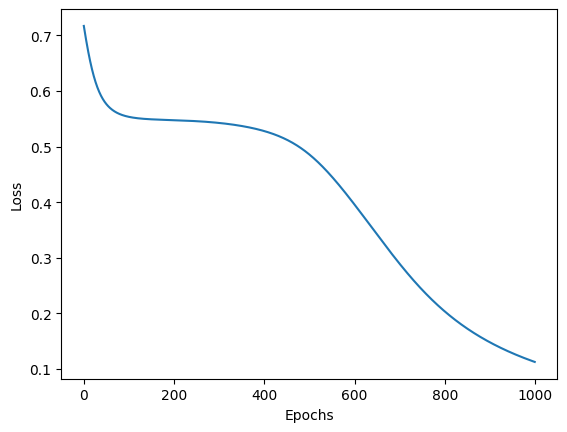

Training Losses are 
          0
0  0.644981
1  0.639971
2  0.635109
3  0.630397
4  0.625840
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3028   16]
 [  31  925]]
Accuracy: 0.9882, Precision: 0.9830, Recall: 0.9676, F1-score: 0.9752

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3030   14]
 [  23  933]]
Accuracy: 0.9908, Precision: 0.9852, Recall: 0.9759, F1-score: 0.9806



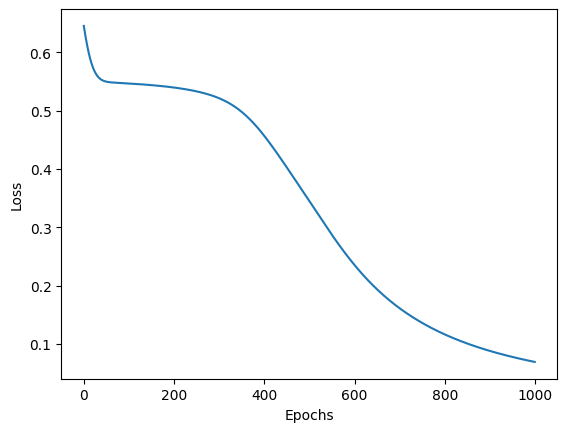

Training Losses are 
          0
0  0.697893
1  0.692658
2  0.687516
3  0.682470
4  0.677526
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3027   17]
 [  41  915]]
Accuracy: 0.9855, Precision: 0.9818, Recall: 0.9571, F1-score: 0.9693

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3027   17]
 [  42  914]]
Accuracy: 0.9852, Precision: 0.9817, Recall: 0.9561, F1-score: 0.9687



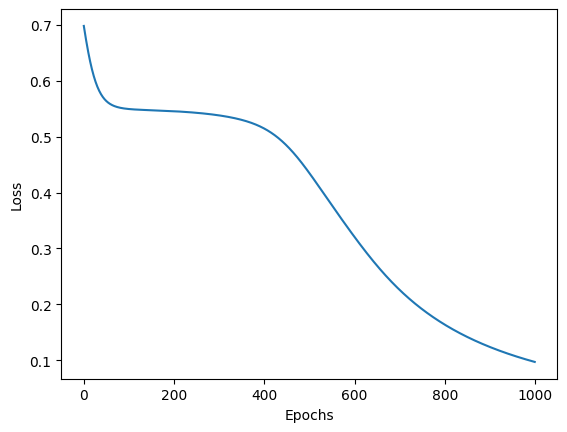

Training Losses are 
          0
0  0.676053
1  0.671388
2  0.666827
3  0.662372
4  0.658024
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3021   23]
 [  52  904]]
Accuracy: 0.9812, Precision: 0.9752, Recall: 0.9456, F1-score: 0.9602

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3025   19]
 [  51  905]]
Accuracy: 0.9825, Precision: 0.9794, Recall: 0.9467, F1-score: 0.9628



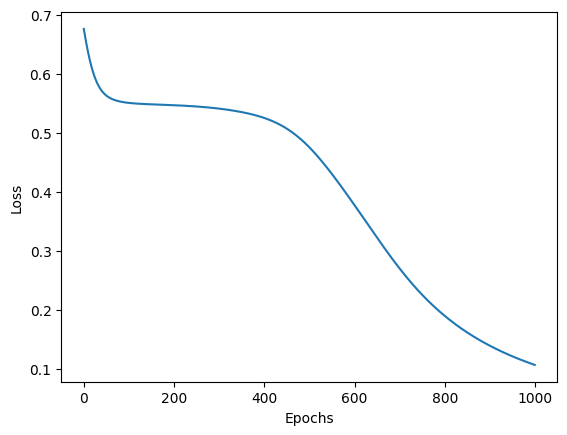

Training Losses are 
          0
0  0.682871
1  0.676787
2  0.670863
3  0.665105
4  0.659515
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3028   16]
 [  25  931]]
Accuracy: 0.9898, Precision: 0.9831, Recall: 0.9738, F1-score: 0.9785

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3030   14]
 [  18  938]]
Accuracy: 0.9920, Precision: 0.9853, Recall: 0.9812, F1-score: 0.9832



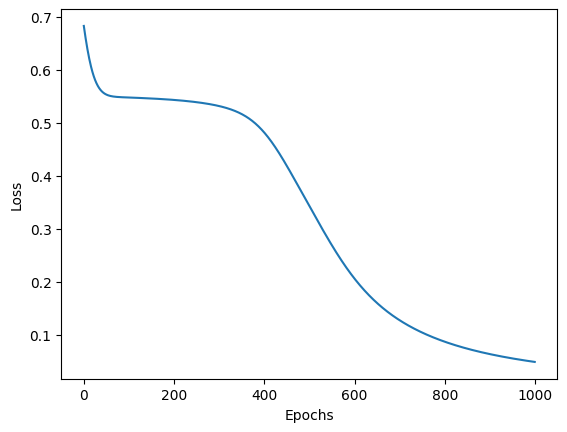

Training Losses are 
          0
0  0.725705
1  0.718446
2  0.711357
3  0.704443
4  0.697707
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3028   16]
 [  33  923]]
Accuracy: 0.9878, Precision: 0.9830, Recall: 0.9655, F1-score: 0.9741

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3026   18]
 [  27  929]]
Accuracy: 0.9888, Precision: 0.9810, Recall: 0.9718, F1-score: 0.9764



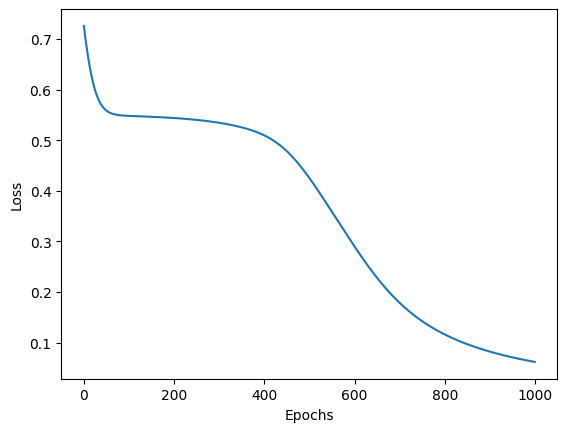

Training Losses are 
          0
0  0.735465
1  0.727825
2  0.720387
3  0.713155
4  0.706131
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3027   17]
 [  34  922]]
Accuracy: 0.9872, Precision: 0.9819, Recall: 0.9644, F1-score: 0.9731

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3026   18]
 [  29  927]]
Accuracy: 0.9882, Precision: 0.9810, Recall: 0.9697, F1-score: 0.9753



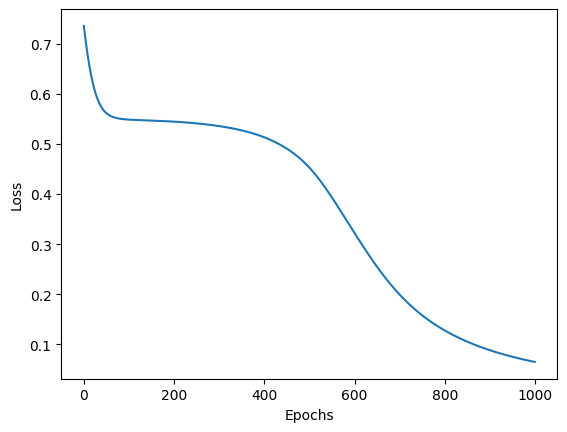

Training Losses are 
          0
0  0.614962
1  0.609243
2  0.603815
3  0.598680
4  0.593839
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3033   11]
 [  16  940]]
Accuracy: 0.9932, Precision: 0.9884, Recall: 0.9833, F1-score: 0.9858

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3035    9]
 [  11  945]]
Accuracy: 0.9950, Precision: 0.9906, Recall: 0.9885, F1-score: 0.9895



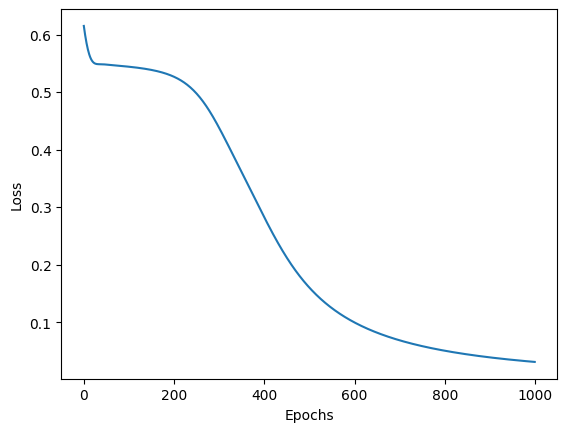

Training Losses are 
          0
0  0.688052
1  0.678008
2  0.668384
3  0.659185
4  0.650416
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3034   10]
 [  12  944]]
Accuracy: 0.9945, Precision: 0.9895, Recall: 0.9874, F1-score: 0.9885

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3035    9]
 [  11  945]]
Accuracy: 0.9950, Precision: 0.9906, Recall: 0.9885, F1-score: 0.9895



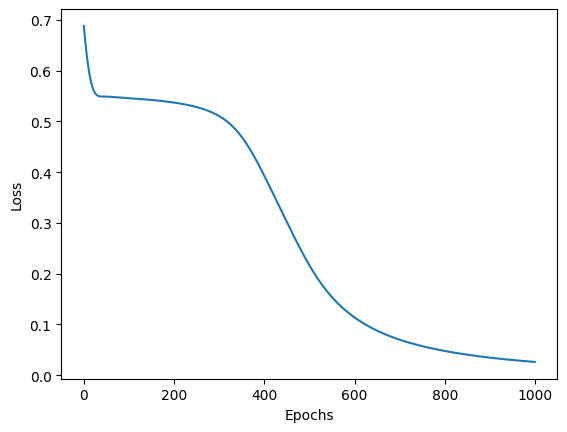

Training Losses are 
          0
0  0.581093
1  0.576637
2  0.572551
3  0.568838
4  0.565497
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3038    6]
 [   5  951]]
Accuracy: 0.9972, Precision: 0.9937, Recall: 0.9948, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



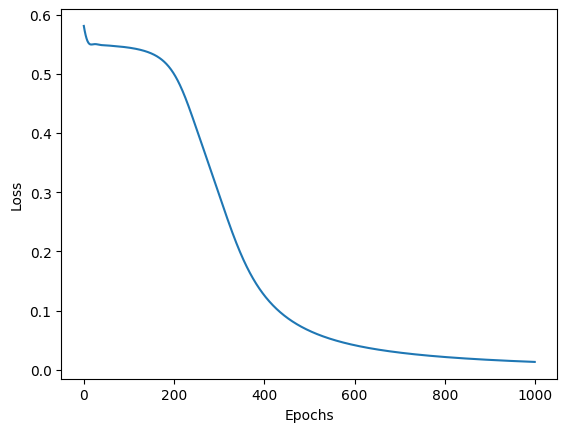

Training Losses are 
          0
0  0.696836
1  0.685698
2  0.675037
3  0.664862
4  0.655179
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3031   13]
 [  17  939]]
Accuracy: 0.9925, Precision: 0.9863, Recall: 0.9822, F1-score: 0.9843

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3033   11]
 [  13  943]]
Accuracy: 0.9940, Precision: 0.9885, Recall: 0.9864, F1-score: 0.9874



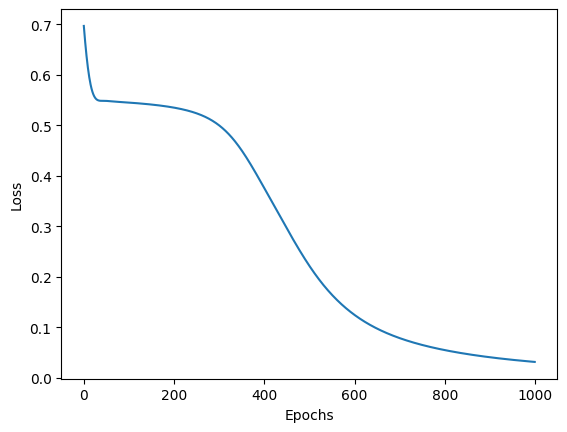

Training Losses are 
          0
0  0.649580
1  0.640777
2  0.632437
3  0.624563
4  0.617155
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3033   11]
 [  14  942]]
Accuracy: 0.9938, Precision: 0.9885, Recall: 0.9854, F1-score: 0.9869

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3035    9]
 [  11  945]]
Accuracy: 0.9950, Precision: 0.9906, Recall: 0.9885, F1-score: 0.9895



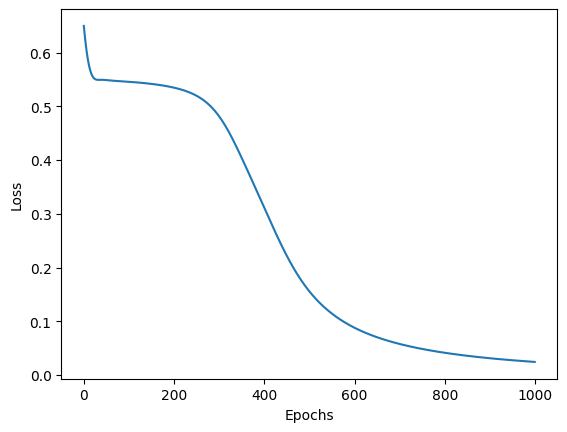

Training Losses are 
          0
0  0.597644
1  0.588547
2  0.580460
3  0.573389
4  0.567326
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3038    6]
 [   5  951]]
Accuracy: 0.9972, Precision: 0.9937, Recall: 0.9948, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



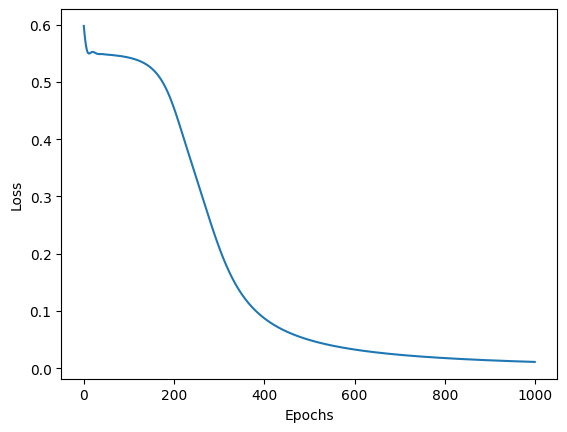

Training Losses are 
          0
0  0.831618
1  0.808208
2  0.785860
3  0.764597
4  0.744433
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3031   13]
 [  16  940]]
Accuracy: 0.9928, Precision: 0.9864, Recall: 0.9833, F1-score: 0.9848

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3034   10]
 [  13  943]]
Accuracy: 0.9942, Precision: 0.9895, Recall: 0.9864, F1-score: 0.9880



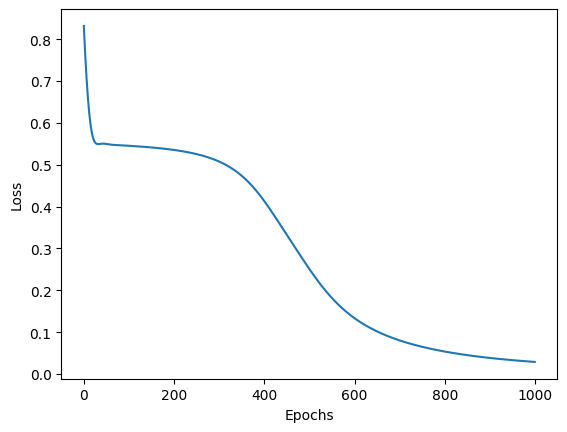

Training Losses are 
          0
0  0.669489
1  0.654891
2  0.641326
3  0.628805
4  0.617328
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3037    7]
 [   6  950]]
Accuracy: 0.9968, Precision: 0.9927, Recall: 0.9937, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



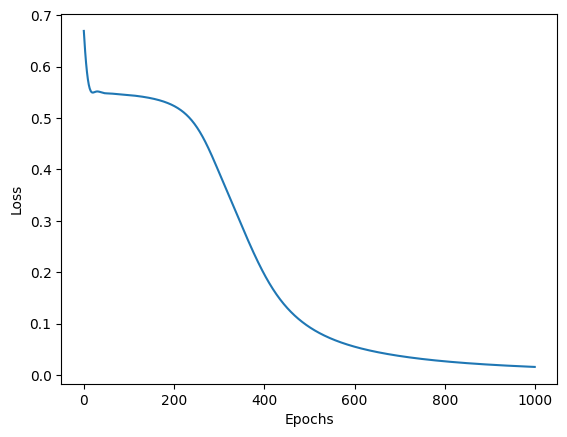

Training Losses are 
          0
0  0.585121
1  0.577439
2  0.570749
3  0.565048
4  0.560320
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3040    4]
 [   5  951]]
Accuracy: 0.9978, Precision: 0.9958, Recall: 0.9948, F1-score: 0.9953



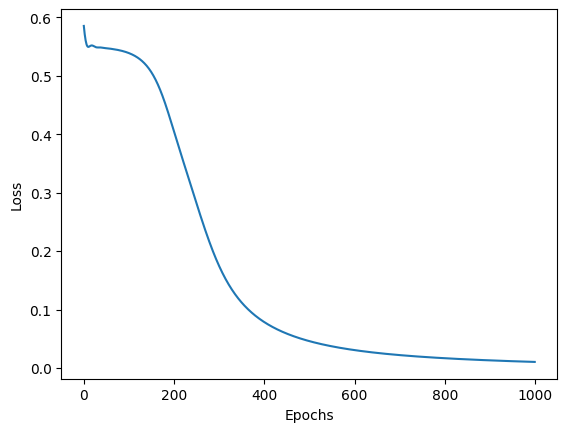

The best accuracy on test data is 0.99775 for layers 64 , 64, 64


In [33]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

Training Losses are 
          0
0  0.741094
1  0.738024
2  0.735005
3  0.732036
4  0.729117
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


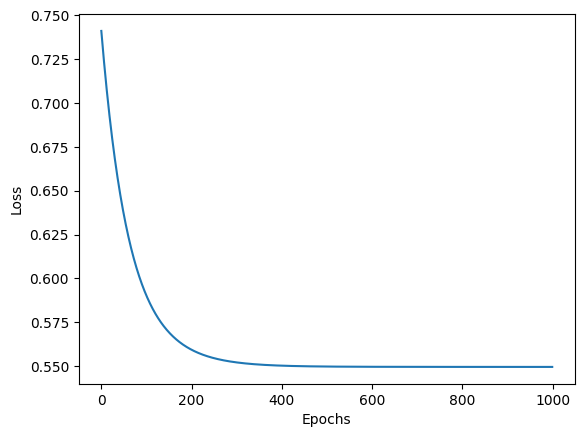

Training Losses are 
          0
0  0.794521
1  0.790407
2  0.786362
3  0.782387
4  0.778479
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


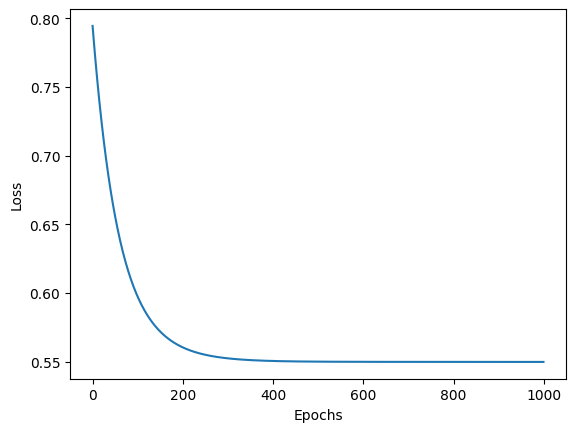

Training Losses are 
          0
0  0.738147
1  0.735464
2  0.732820
3  0.730215
4  0.727648
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


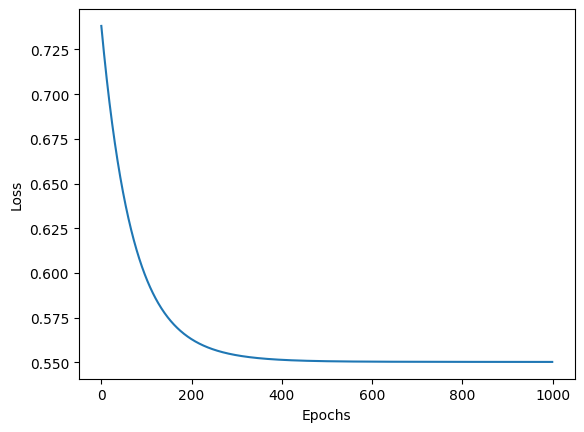

Training Losses are 
          0
0  0.677755
1  0.676003
2  0.674277
3  0.672575
4  0.670898
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


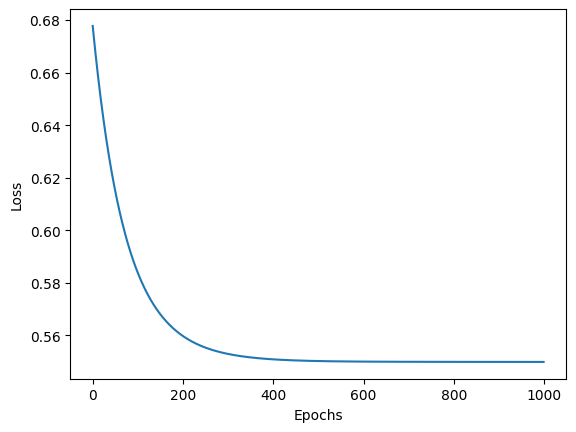

Training Losses are 
          0
0  0.758237
1  0.753416
2  0.748710
3  0.744116
4  0.739633
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


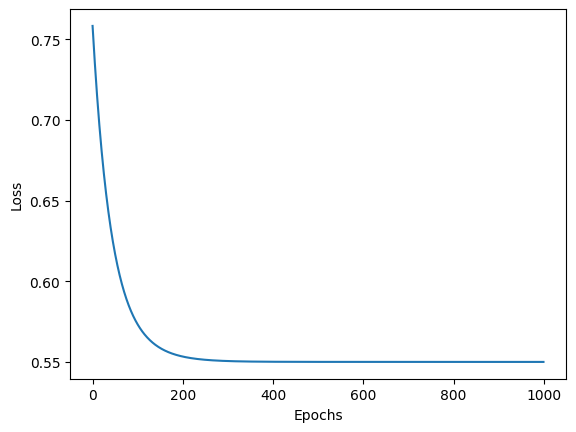

Training Losses are 
          0
0  0.701140
1  0.697279
2  0.693522
3  0.689866
4  0.686308
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


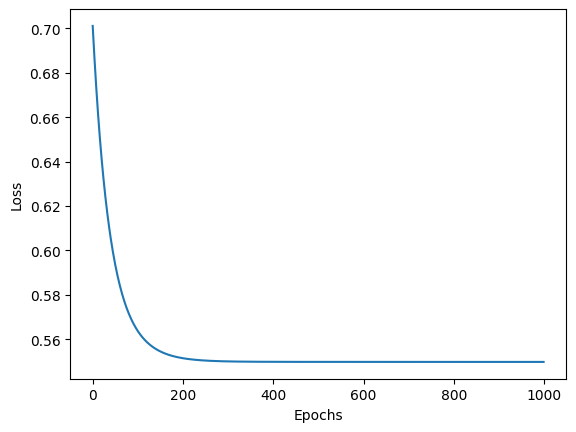

Training Losses are 
          0
0  0.708276
1  0.704535
2  0.700888
3  0.697330
4  0.693861
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


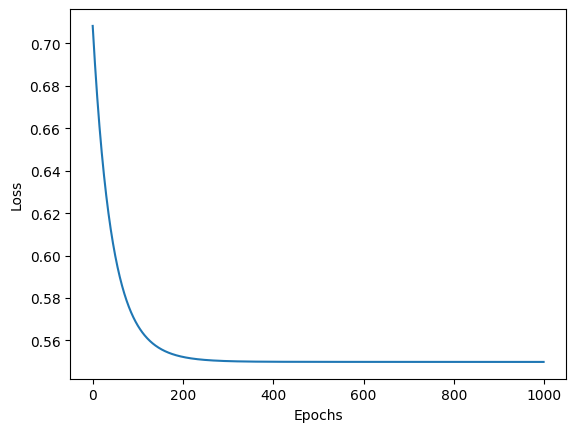

Training Losses are 
          0
0  0.749103
1  0.744324
2  0.739662
3  0.735117
4  0.730684
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


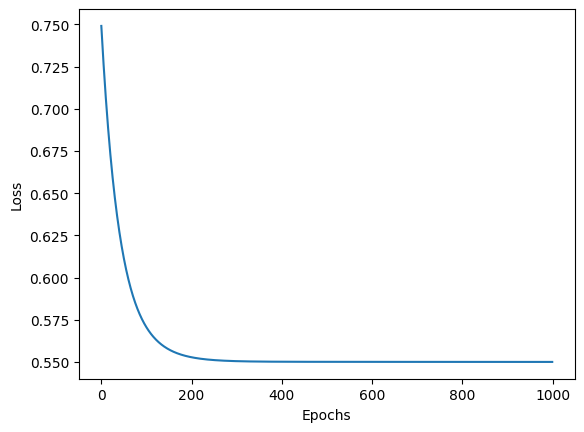

Training Losses are 
          0
0  0.653014
1  0.648098
2  0.643430
3  0.638998
4  0.634789
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


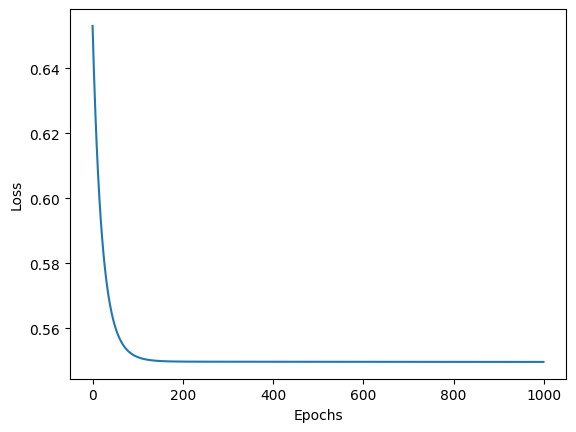

Training Losses are 
          0
0  0.722225
1  0.714215
2  0.706591
3  0.699336
4  0.692432
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


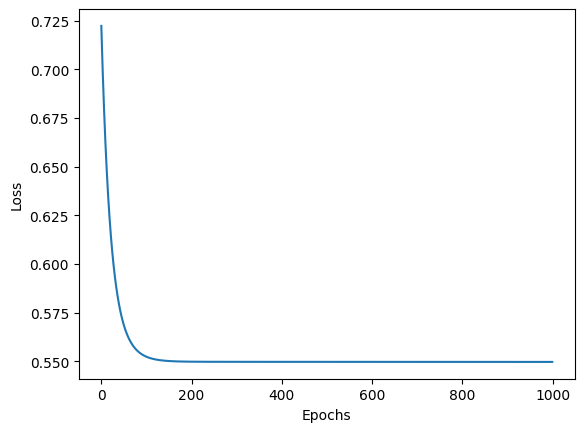

Training Losses are 
          0
0  0.569637
1  0.568811
2  0.568022
3  0.567267
4  0.566545
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


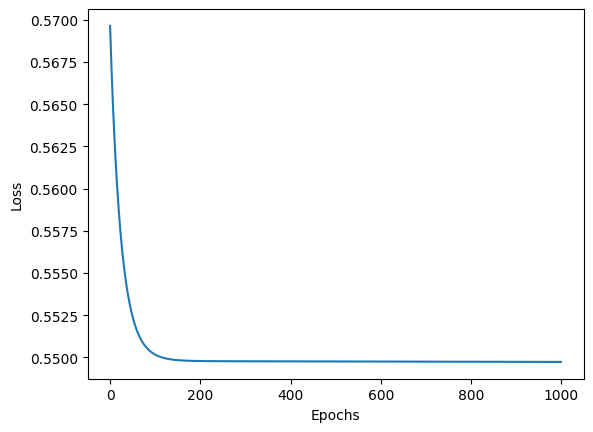

Training Losses are 
          0
0  0.821018
1  0.808575
2  0.796702
3  0.785376
4  0.774575
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


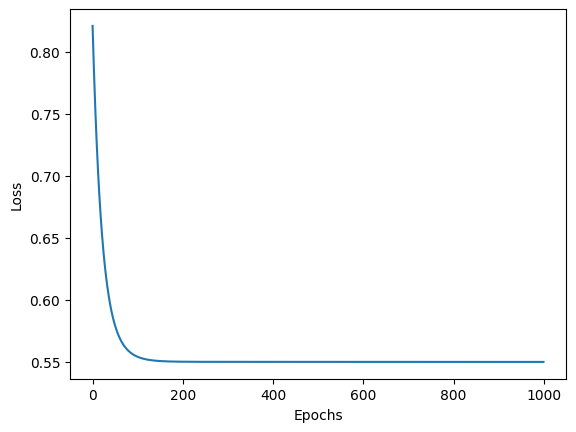

Training Losses are 
          0
0  0.885504
1  0.858930
2  0.834400
3  0.811784
4  0.790956
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


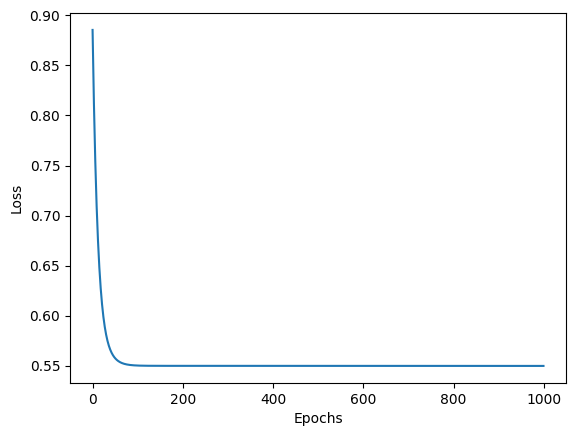

Training Losses are 
          0
0  0.724396
1  0.709721
2  0.696332
3  0.684116
4  0.672971
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


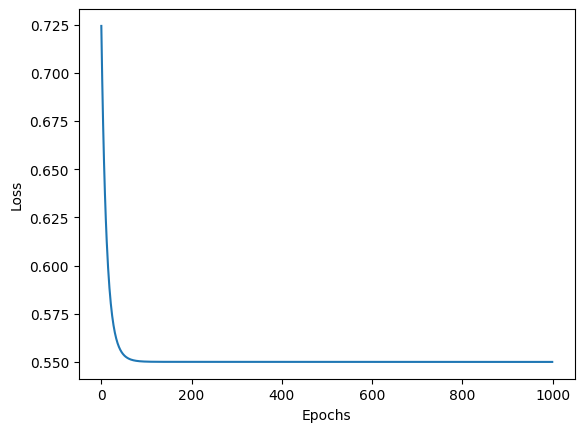

Training Losses are 
          0
0  0.711174
1  0.697977
2  0.685906
3  0.674866
4  0.664767
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


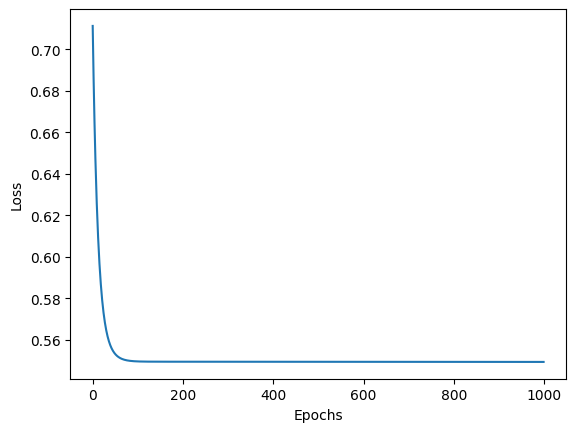

Training Losses are 
          0
0  0.754645
1  0.738326
2  0.723345
3  0.709597
4  0.696983
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


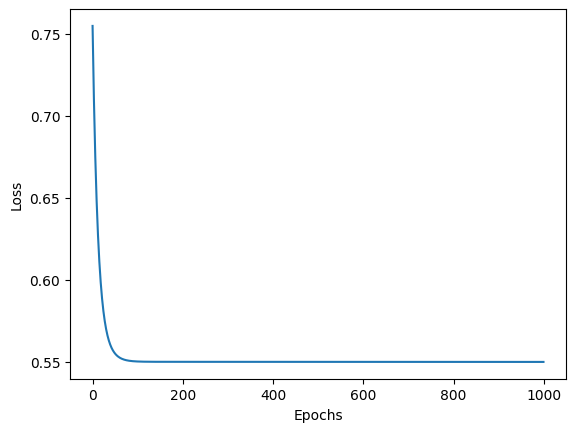

Training Losses are 
          0
0  0.727885
1  0.725207
2  0.722573
3  0.719981
4  0.717431
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


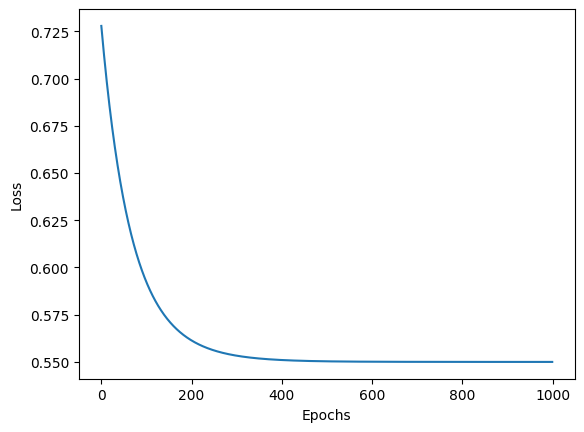

Training Losses are 
          0
0  0.554534
1  0.554473
2  0.554413
3  0.554354
4  0.554296
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


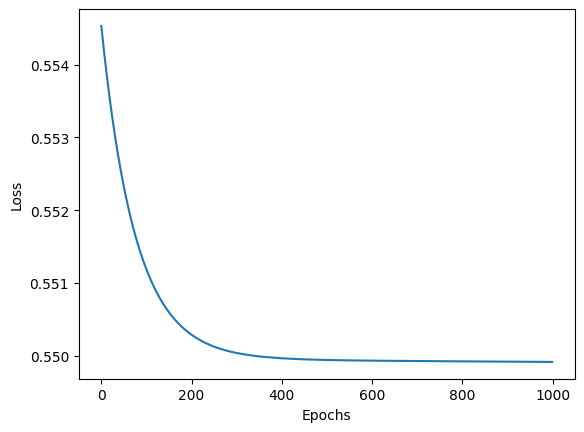

Training Losses are 
          0
0  0.634905
1  0.633726
2  0.632563
3  0.631418
4  0.630290
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


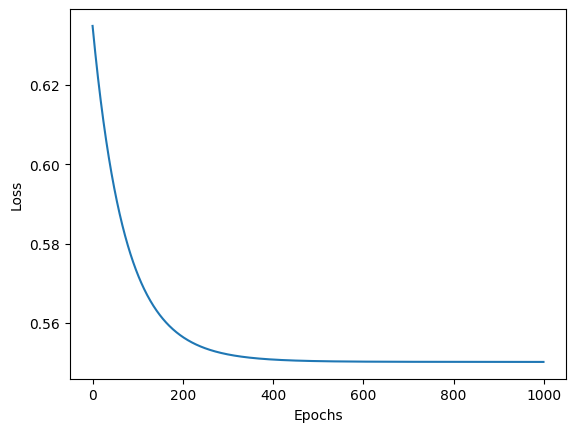

Training Losses are 
          0
0  0.632403
1  0.631185
2  0.629985
3  0.628804
4  0.627641
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


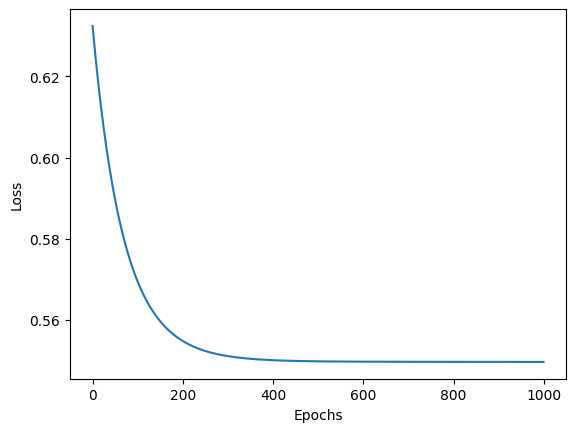

Training Losses are 
          0
0  0.698596
1  0.694891
2  0.691283
3  0.687770
4  0.684348
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


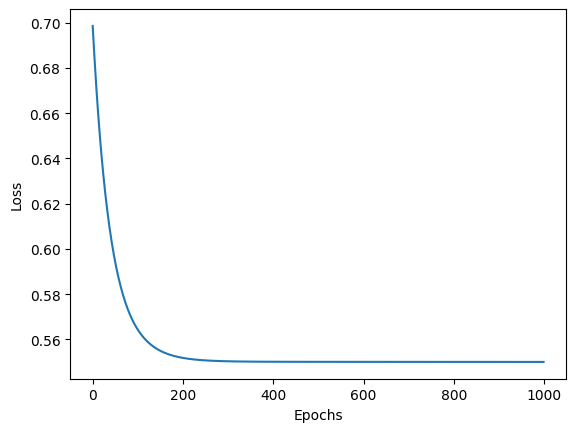

Training Losses are 
          0
0  0.695450
1  0.692114
2  0.688859
3  0.685681
4  0.682581
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


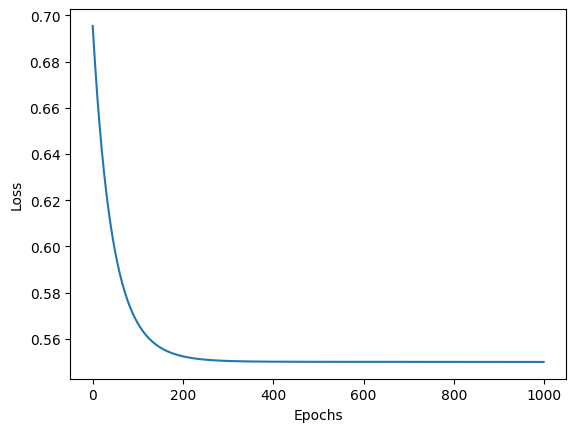

Training Losses are 
          0
0  0.964874
1  0.954529
2  0.944428
3  0.934566
4  0.924939
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


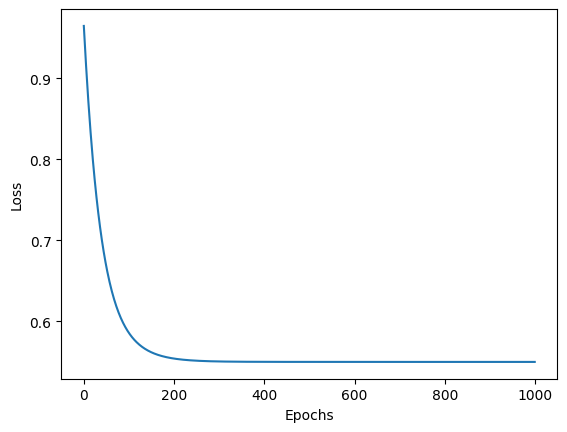

Training Losses are 
          0
0  0.665365
1  0.662755
2  0.660207
3  0.657720
4  0.655292
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


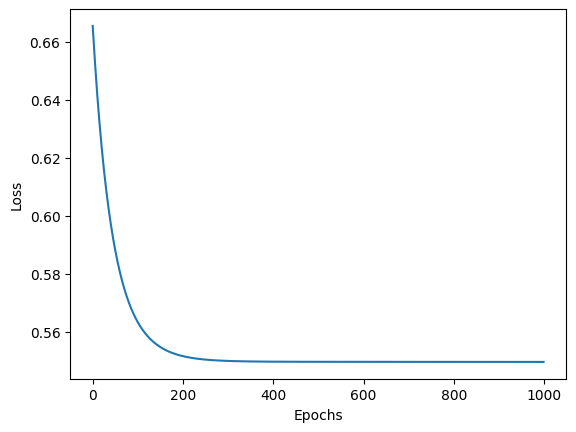

Training Losses are 
          0
0  0.720068
1  0.713113
2  0.706455
3  0.700081
4  0.693979
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


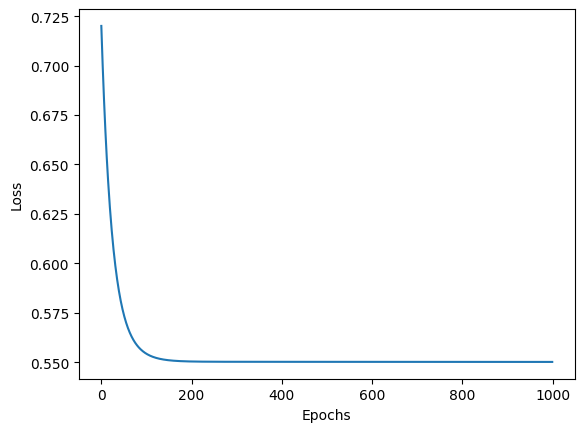

Training Losses are 
          0
0  0.609172
1  0.606659
2  0.604259
3  0.601967
4  0.599777
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


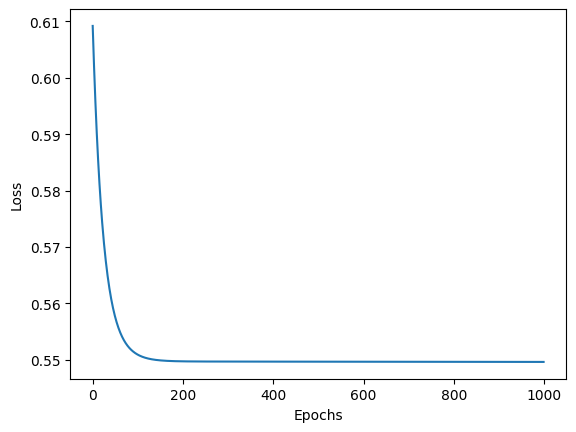

Training Losses are 
          0
0  0.740120
1  0.731524
2  0.723330
3  0.715520
4  0.708076
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


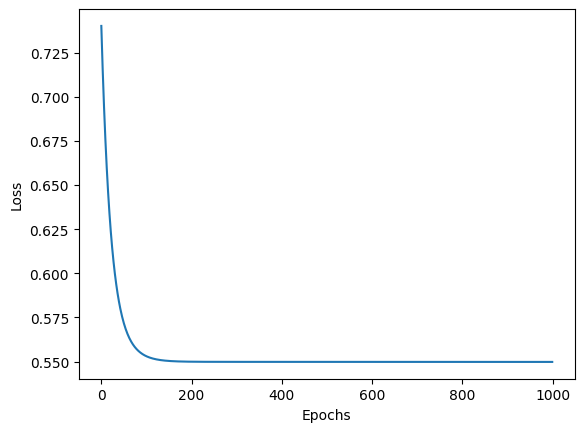

Training Losses are 
          0
0  0.778414
1  0.768600
2  0.759216
3  0.750244
4  0.741667
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


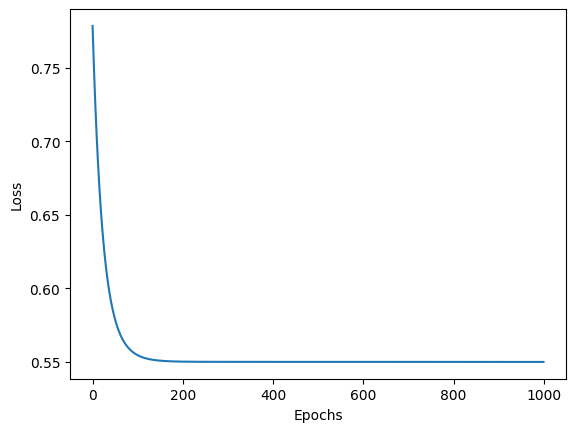

Training Losses are 
          0
0  0.685692
1  0.673739
2  0.662893
3  0.653049
4  0.644113
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


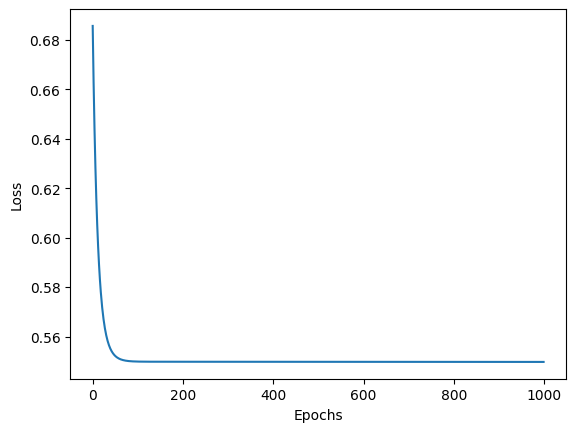

Training Losses are 
          0
0  1.011896
1  0.971309
2  0.933973
3  0.899720
4  0.868368
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


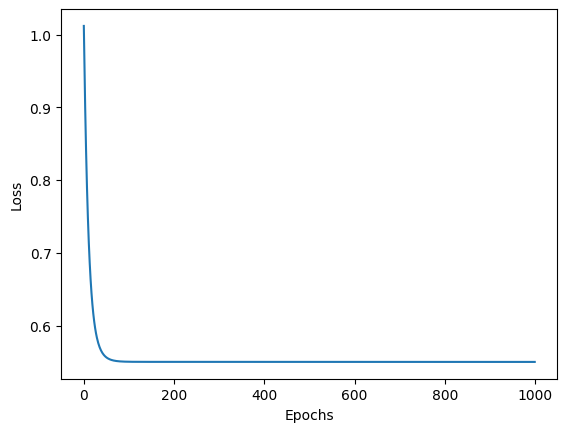

Training Losses are 
          0
0  0.741171
1  0.725249
2  0.710698
3  0.697403
4  0.685257
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


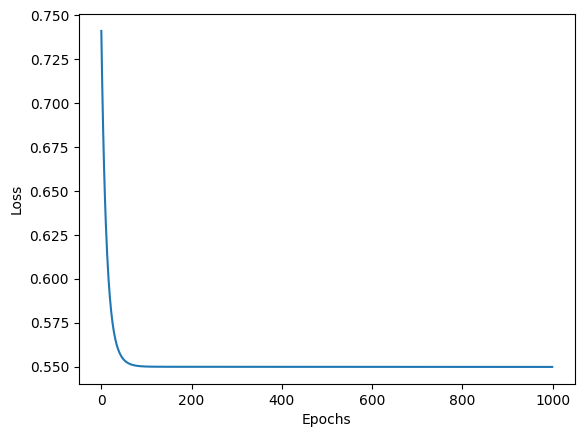

Training Losses are 
          0
0  0.826488
1  0.804706
2  0.784634
3  0.766152
4  0.749146
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


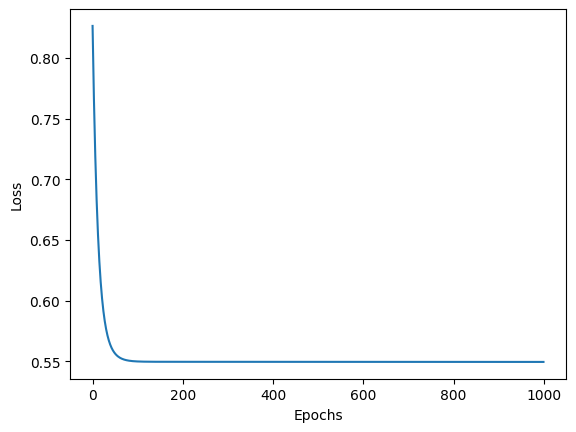

Training Losses are 
          0
0  0.659110
1  0.657505
2  0.655925
3  0.654370
4  0.652839
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


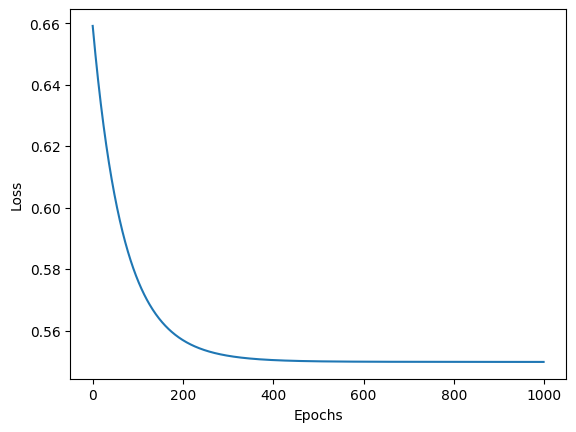

Training Losses are 
          0
0  0.583951
1  0.583450
2  0.582956
3  0.582470
4  0.581992
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


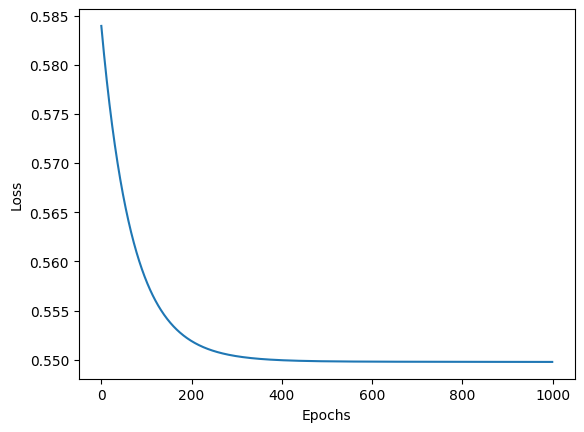

Training Losses are 
          0
0  0.622152
1  0.621103
2  0.620071
3  0.619054
4  0.618052
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


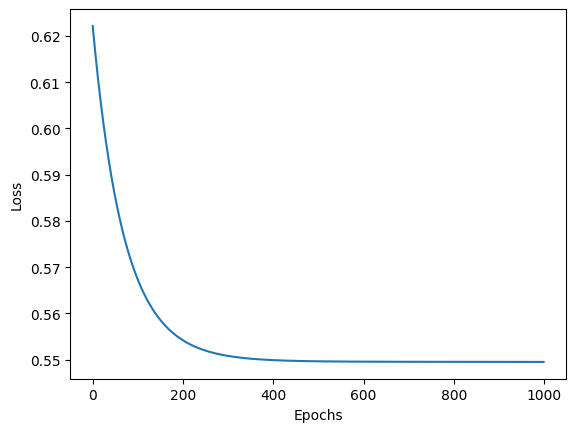

Training Losses are 
          0
0  0.722193
1  0.719601
2  0.717052
3  0.714545
4  0.712077
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


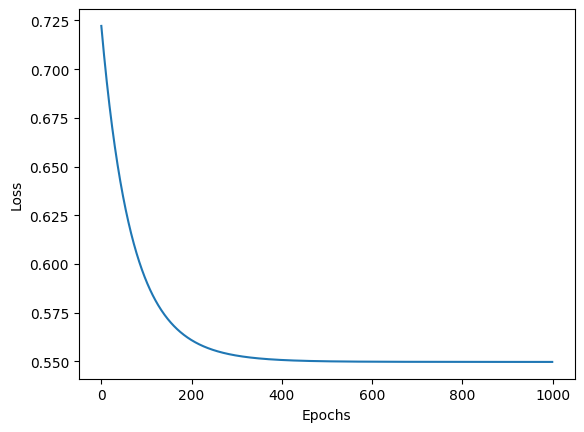

Training Losses are 
          0
0  0.739505
1  0.735065
2  0.730734
3  0.726508
4  0.722385
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


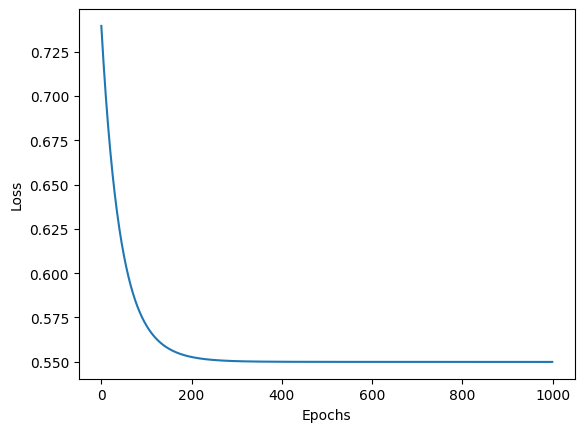

Training Losses are 
          0
0  0.740734
1  0.735778
2  0.730957
3  0.726266
4  0.721702
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


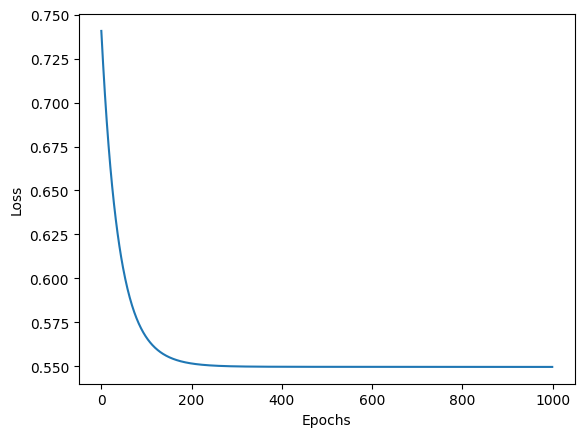

Training Losses are 
          0
0  0.716397
1  0.711981
2  0.707688
3  0.703514
4  0.699456
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


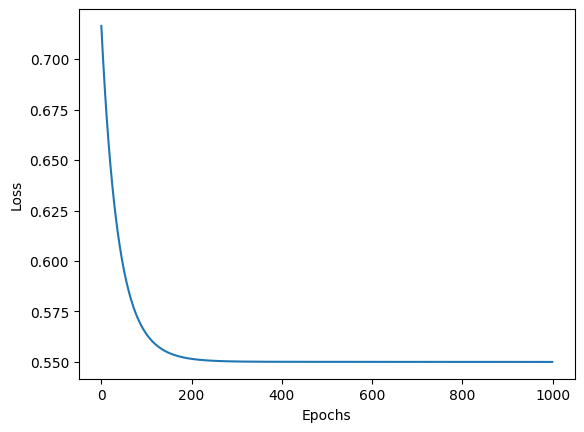

Training Losses are 
          0
0  0.796583
1  0.790066
2  0.783726
3  0.777559
4  0.771560
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


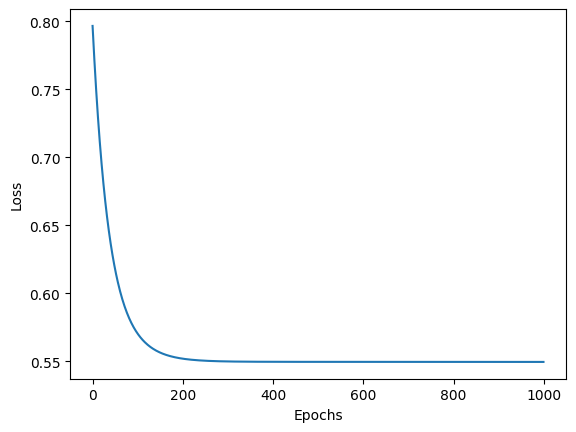

Training Losses are 
          0
0  0.686137
1  0.680129
2  0.674402
3  0.668940
4  0.663733
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


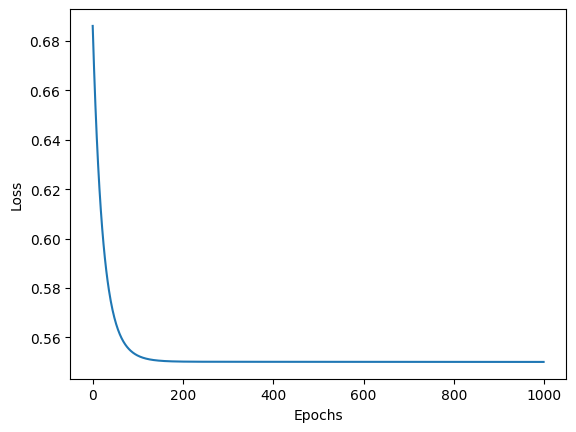

Training Losses are 
          0
0  0.639154
1  0.635103
2  0.631249
3  0.627581
4  0.624088
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


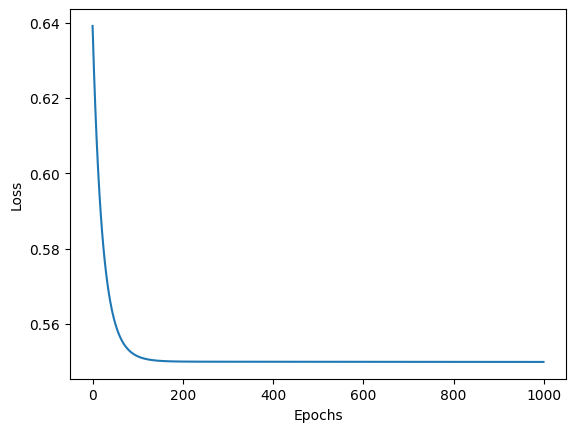

Training Losses are 
          0
0  0.568829
1  0.568131
2  0.567459
3  0.566814
4  0.566194
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


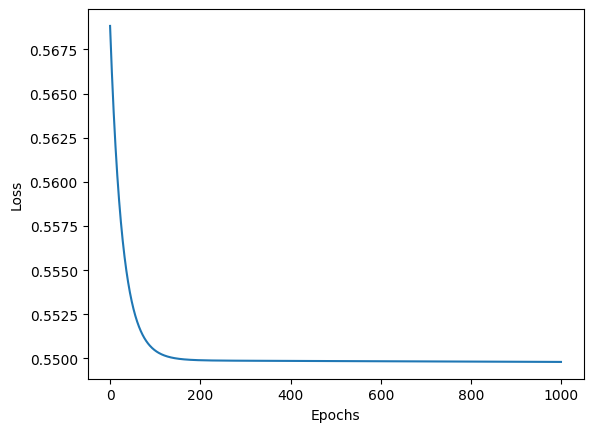

Training Losses are 
          0
0  0.725559
1  0.718294
2  0.711342
3  0.704690
4  0.698325
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


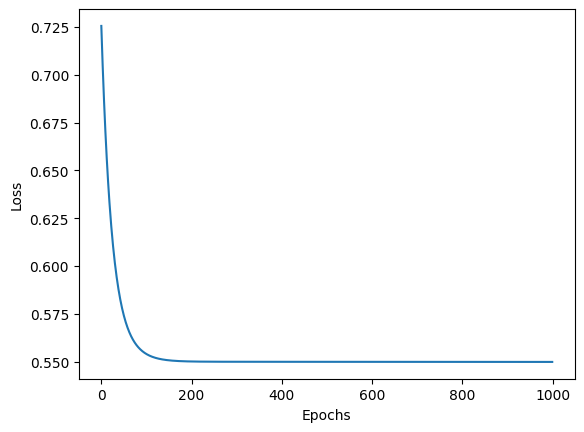

Training Losses are 
          0
0  0.610866
1  0.606328
2  0.602149
3  0.598300
4  0.594751
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


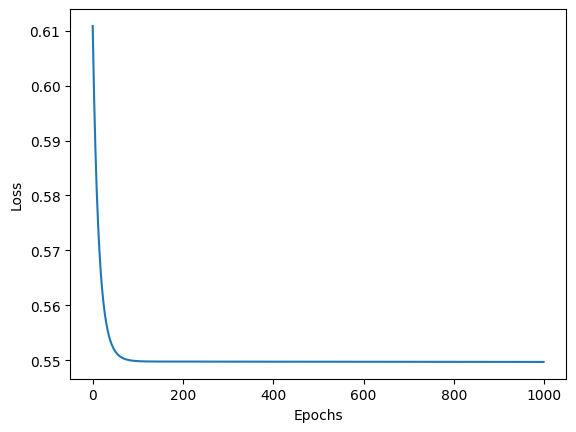

Training Losses are 
          0
0  0.642203
1  0.634923
2  0.628254
3  0.622142
4  0.616539
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


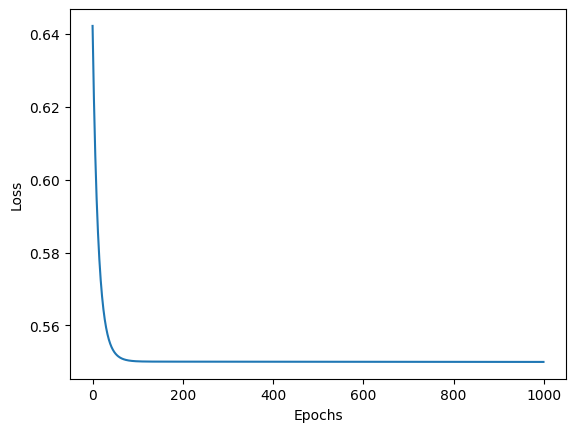

Training Losses are 
          0
0  0.694823
1  0.683689
2  0.673455
3  0.664046
4  0.655395
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


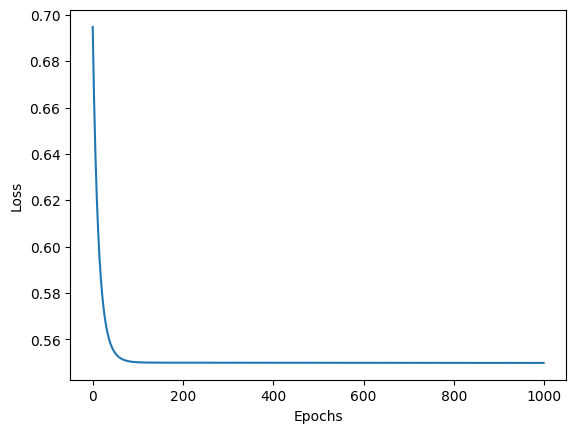

Training Losses are 
          0
0  0.833146
1  0.808880
2  0.786688
3  0.766413
4  0.747906
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


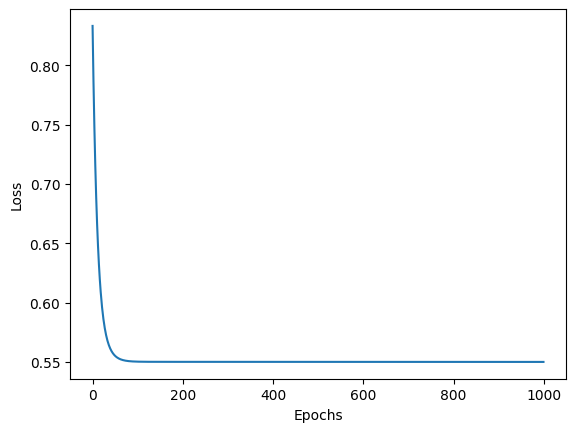

Training Losses are 
          0
0  0.739153
1  0.736113
2  0.733123
3  0.730184
4  0.727294
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


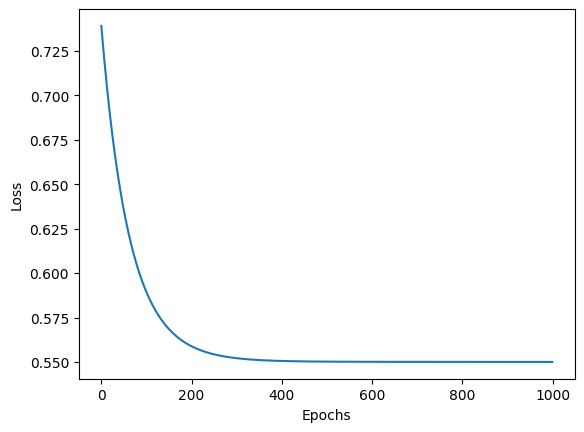

Training Losses are 
          0
0  0.783979
1  0.780082
2  0.776254
3  0.772495
4  0.768805
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


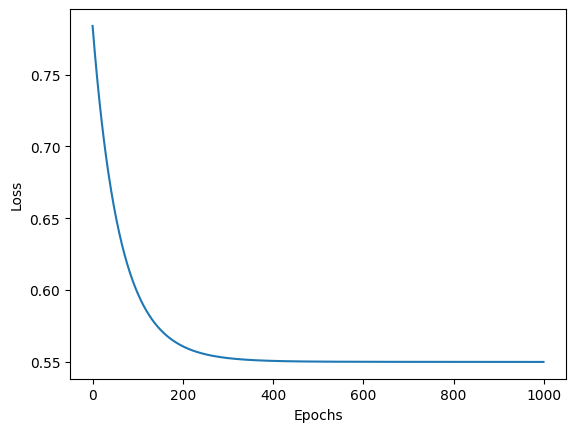

Training Losses are 
          0
0  0.671548
1  0.669457
2  0.667404
3  0.665386
4  0.663404
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


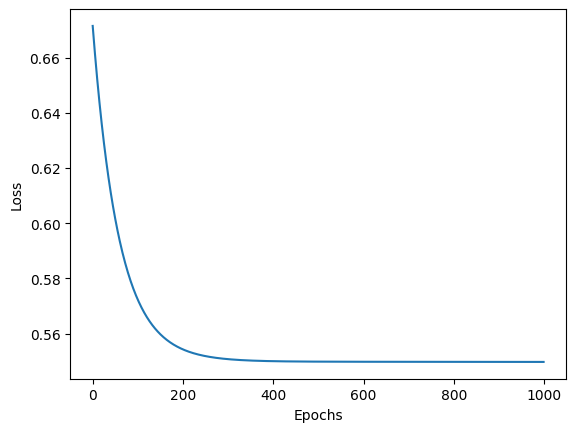

Training Losses are 
          0
0  0.602407
1  0.601655
2  0.600914
3  0.600185
4  0.599466
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


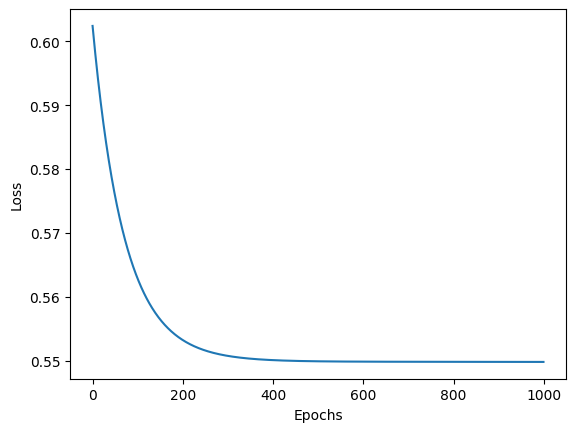

Training Losses are 
          0
0  0.560675
1  0.560423
2  0.560177
3  0.559937
4  0.559703
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


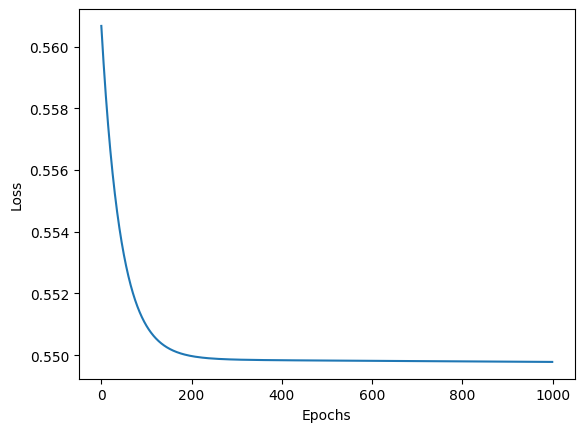

Training Losses are 
          0
0  0.676223
1  0.673236
2  0.670323
3  0.667480
4  0.664708
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


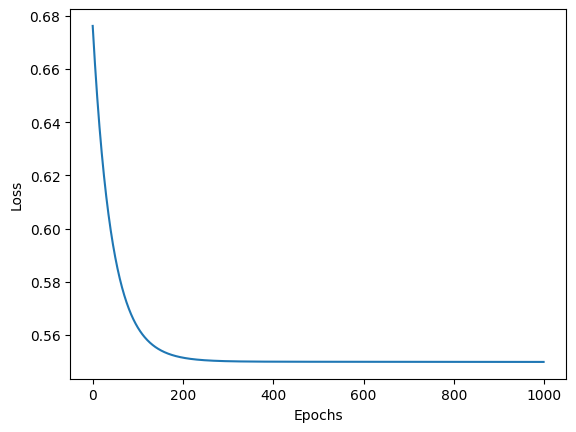

Training Losses are 
          0
0  0.775923
1  0.770274
2  0.764770
3  0.759408
4  0.754184
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


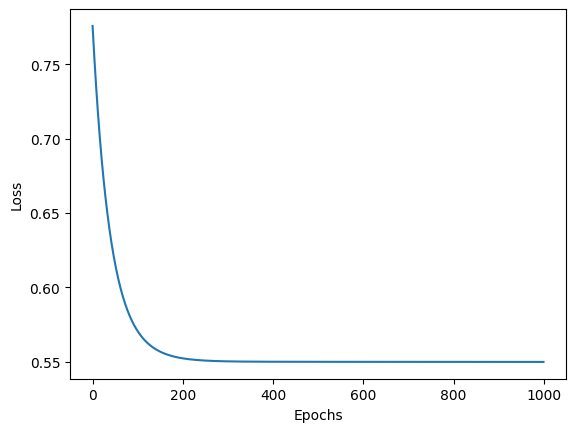

Training Losses are 
          0
0  0.712806
1  0.708656
2  0.704616
3  0.700682
4  0.696851
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


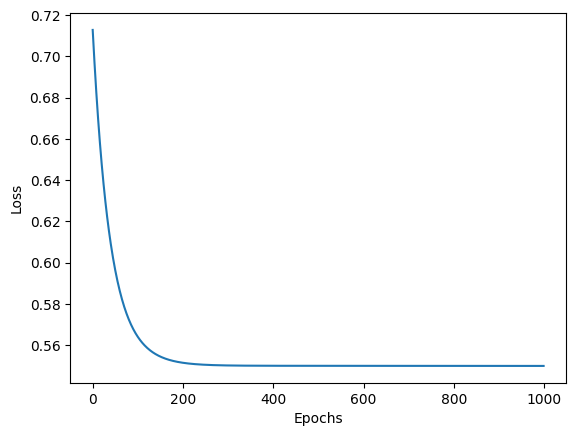

Training Losses are 
          0
0  0.686721
1  0.680392
2  0.674370
3  0.668640
4  0.663188
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


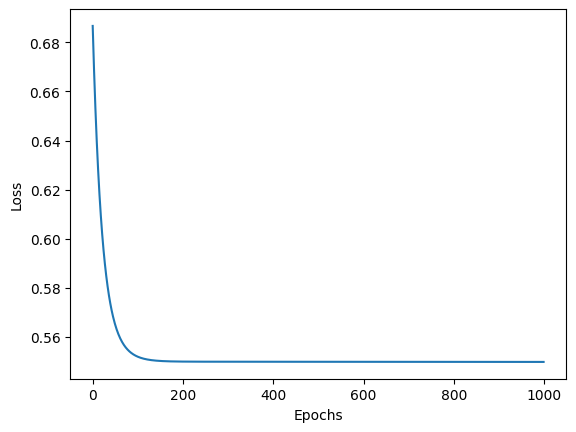

Training Losses are 
          0
0  0.735791
1  0.727958
2  0.720468
3  0.713306
4  0.706459
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


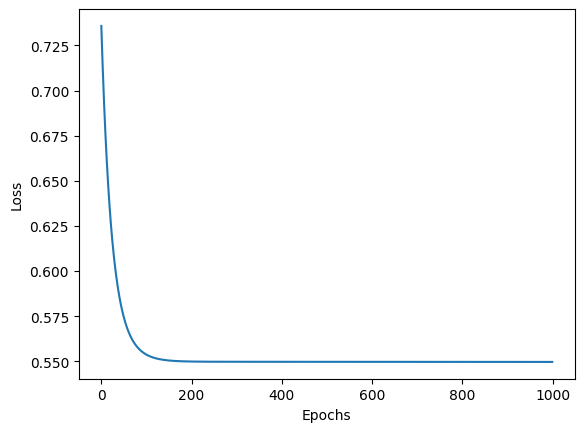

Training Losses are 
          0
0  0.644454
1  0.640610
2  0.636932
3  0.633412
4  0.630042
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


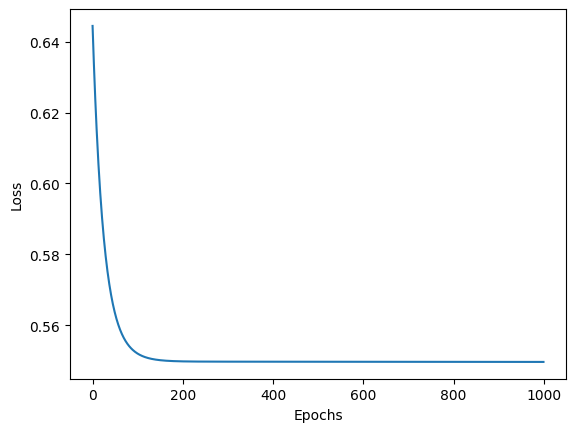

Training Losses are 
          0
0  0.621817
1  0.618715
2  0.615755
3  0.612931
4  0.610236
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


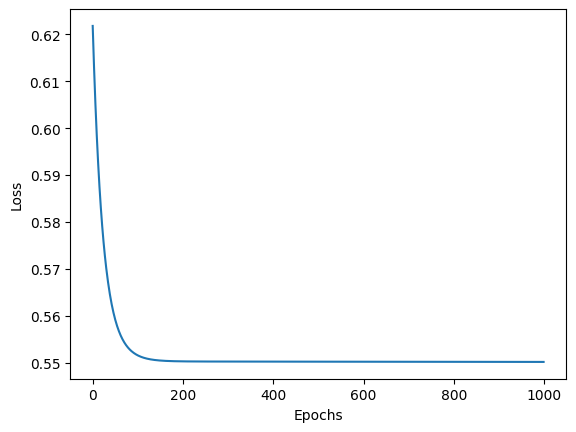

Training Losses are 
          0
0  0.738924
1  0.723183
2  0.708802
3  0.695665
4  0.683667
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


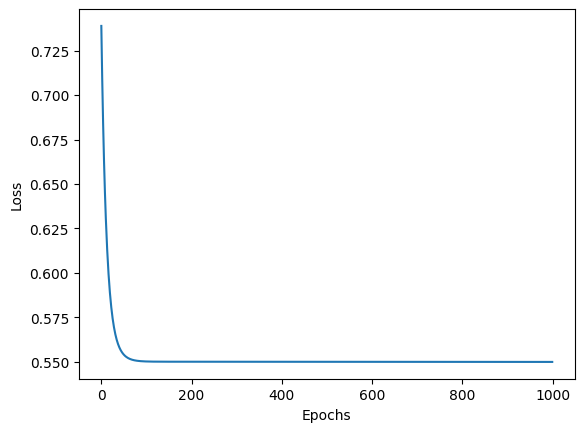

Training Losses are 
          0
0  0.655597
1  0.647111
2  0.639348
3  0.632244
4  0.625740
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


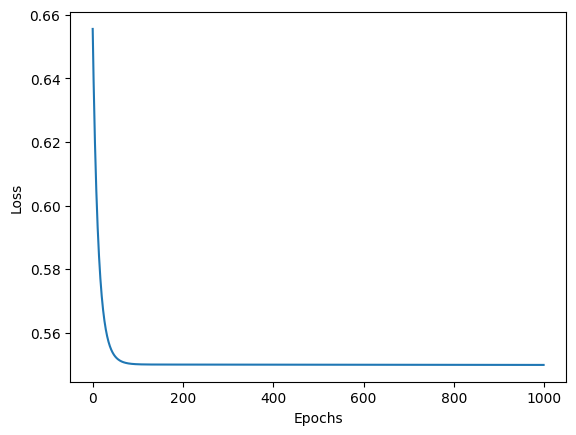

Training Losses are 
          0
0  0.765491
1  0.746683
2  0.729560
3  0.713976
4  0.699798
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


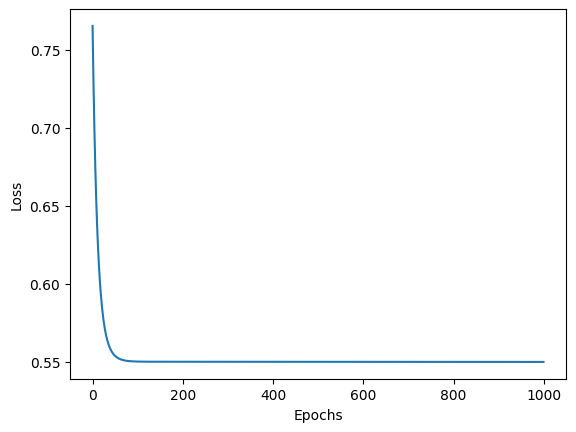

Training Losses are 
          0
0  0.787475
1  0.767666
2  0.749537
3  0.732955
4  0.717795
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


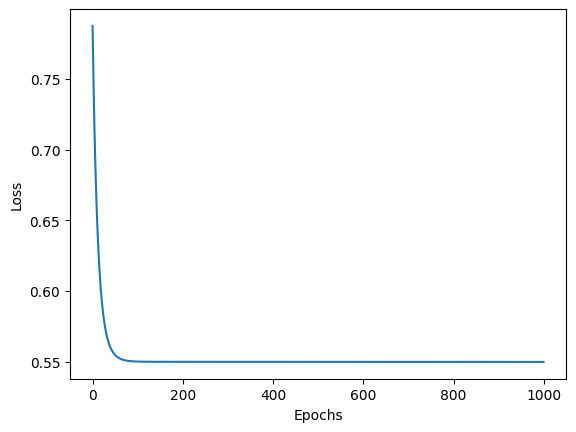

In [34]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()